In [1]:
import pandas as pd
from tqdm import tqdm
import os
from collections import defaultdict

# 读取情感词典
sentiment_dict = pd.ExcelFile('E:\\中文金融情感词典.xlsx', engine='openpyxl')
negative_words = pd.read_excel(sentiment_dict, sheet_name='negative')['Negative Word'].astype(str).tolist()
positive_words = pd.read_excel(sentiment_dict, sheet_name='positive')['Positive Word'].astype(str).tolist()

negative_word_count = defaultdict(int)
positive_word_count = defaultdict(int)

news_files = [f for f in os.listdir('E:\\infobank_news') if f.endswith('.xlsx')]

# 遍历新闻文件并筛选词汇
for file in tqdm(news_files, desc="Processing files"):
    try:
        print(f"Processing file: {file}")
        
        news_data = pd.read_excel(os.path.join('E:\\infobank_news', file), engine='openpyxl')
        news_data['正文'] = news_data['正文'].astype(str)
        
        for text in news_data['正文']:
            for word in negative_words:
                if word in text:
                    negative_word_count[word] += 1
                    
            for word in positive_words:
                if word in text:
                    positive_word_count[word] += 1
                    
    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue

# 筛选出现次数大于等于10的词
filtered_negative_words = {word: count for word, count in negative_word_count.items() if count >= 10}
filtered_positive_words = {word: count for word, count in positive_word_count.items() if count >= 10}

# 创建新的DataFrame，并添加编号
df_negative = pd.DataFrame(
    [(f"n{i+1}", word, count) for i, (word, count) in enumerate(filtered_negative_words.items())],
    columns=['ID', 'Negative Word', 'Count']
)

df_positive = pd.DataFrame(
    [(f"p{i+1}", word, count) for i, (word, count) in enumerate(filtered_positive_words.items())],
    columns=['ID', 'Positive Word', 'Count']
)

# 保存到新的Excel文件
with pd.ExcelWriter('C:\\Users\\mjy\\Desktop\\Project_MSCM\\new_dictionary.xlsx', engine='openpyxl') as writer:
    df_negative.to_excel(writer, sheet_name='Negative Word', index=False)
    df_positive.to_excel(writer, sheet_name='Positive Word', index=False)


Processing files:   0%|                                                                       | 0/1032 [00:00<?, ?it/s]

Processing file: infobank_news_20210304.xlsx


Processing files:   0%|                                                               | 1/1032 [00:00<04:33,  3.77it/s]

Processing file: infobank_news_20210305.xlsx


Processing files:   0%|▏                                                              | 4/1032 [00:00<02:34,  6.64it/s]

Processing file: infobank_news_20210306.xlsx
Processing file: infobank_news_20210307.xlsx
Processing file: infobank_news_20210308.xlsx


Processing files:   0%|▎                                                              | 5/1032 [00:00<02:38,  6.48it/s]

Processing file: infobank_news_20210309.xlsx


Processing files:   1%|▎                                                              | 6/1032 [00:01<04:39,  3.67it/s]

Processing file: infobank_news_20210310.xlsx


Processing files:   1%|▍                                                              | 7/1032 [00:01<05:39,  3.02it/s]

Processing file: infobank_news_20210311.xlsx


Processing files:   1%|▍                                                              | 8/1032 [00:02<06:56,  2.46it/s]

Processing file: infobank_news_20210312.xlsx


Processing files:   1%|▌                                                             | 10/1032 [00:03<06:45,  2.52it/s]

Processing file: infobank_news_20210313.xlsx
Processing file: infobank_news_20210314.xlsx
Processing file: infobank_news_20210315.xlsx


Processing files:   1%|▋                                                             | 12/1032 [00:04<06:43,  2.53it/s]

Processing file: infobank_news_20210316.xlsx


Processing files:   1%|▊                                                             | 13/1032 [00:04<07:51,  2.16it/s]

Processing file: infobank_news_20210317.xlsx


Processing files:   1%|▊                                                             | 14/1032 [00:05<08:38,  1.96it/s]

Processing file: infobank_news_20210318.xlsx


Processing files:   1%|▉                                                             | 15/1032 [00:06<09:14,  1.83it/s]

Processing file: infobank_news_20210319.xlsx


Processing files:   2%|▉                                                             | 16/1032 [00:06<10:21,  1.63it/s]

Processing file: infobank_news_20210320.xlsx


Processing files:   2%|█                                                             | 17/1032 [00:07<08:57,  1.89it/s]

Processing file: infobank_news_20210321.xlsx
Processing file: infobank_news_20210322.xlsx


Processing files:   2%|█▏                                                            | 19/1032 [00:07<07:28,  2.26it/s]

Processing file: infobank_news_20210323.xlsx


Processing files:   2%|█▏                                                            | 20/1032 [00:08<07:58,  2.12it/s]

Processing file: infobank_news_20210324.xlsx


Processing files:   2%|█▎                                                            | 21/1032 [00:09<08:59,  1.87it/s]

Processing file: infobank_news_20210325.xlsx


Processing files:   2%|█▎                                                            | 22/1032 [00:09<09:18,  1.81it/s]

Processing file: infobank_news_20210326.xlsx


Processing files:   2%|█▍                                                            | 24/1032 [00:10<08:07,  2.07it/s]

Processing file: infobank_news_20210327.xlsx


Processing files:   2%|█▌                                                            | 25/1032 [00:10<06:41,  2.51it/s]

Processing file: infobank_news_20210328.xlsx
Processing file: infobank_news_20210329.xlsx


Processing files:   3%|█▌                                                            | 26/1032 [00:11<06:13,  2.69it/s]

Processing file: infobank_news_20210330.xlsx


Processing files:   3%|█▌                                                            | 27/1032 [00:11<06:36,  2.54it/s]

Processing file: infobank_news_20210331.xlsx


Processing files:   3%|█▋                                                            | 28/1032 [00:11<06:06,  2.74it/s]

Processing file: infobank_news_20210401.xlsx


Processing files:   3%|█▋                                                            | 29/1032 [00:12<07:00,  2.39it/s]

Processing file: infobank_news_20210402.xlsx


Processing files:   3%|█▊                                                            | 30/1032 [00:12<07:28,  2.24it/s]

Processing file: infobank_news_20210403.xlsx


Processing files:   3%|█▉                                                            | 33/1032 [00:13<04:00,  4.16it/s]

Processing file: infobank_news_20210404.xlsx
Processing file: infobank_news_20210405.xlsx
Processing file: infobank_news_20210406.xlsx


Processing files:   3%|██                                                            | 34/1032 [00:13<05:49,  2.86it/s]

Processing file: infobank_news_20210407.xlsx


Processing files:   3%|██                                                            | 35/1032 [00:14<06:44,  2.46it/s]

Processing file: infobank_news_20210408.xlsx


Processing files:   3%|██▏                                                           | 36/1032 [00:14<06:23,  2.60it/s]

Processing file: infobank_news_20210409.xlsx


Processing files:   4%|██▏                                                           | 37/1032 [00:15<05:55,  2.80it/s]

Processing file: infobank_news_20210410.xlsx


Processing files:   4%|██▎                                                           | 38/1032 [00:15<05:39,  2.92it/s]

Processing file: infobank_news_20210411.xlsx
Processing file: infobank_news_20210412.xlsx


Processing files:   4%|██▍                                                           | 40/1032 [00:15<04:57,  3.33it/s]

Processing file: infobank_news_20210413.xlsx


Processing files:   4%|██▍                                                           | 41/1032 [00:16<05:39,  2.92it/s]

Processing file: infobank_news_20210414.xlsx


Processing files:   4%|██▌                                                           | 43/1032 [00:16<04:57,  3.33it/s]

Processing file: infobank_news_20210415.xlsx
Processing file: infobank_news_20210416.xlsx


Processing files:   4%|██▋                                                           | 45/1032 [00:17<05:56,  2.77it/s]

Processing file: infobank_news_20210417.xlsx
Processing file: infobank_news_20210418.xlsx


Processing files:   4%|██▊                                                           | 46/1032 [00:18<04:59,  3.30it/s]

Processing file: infobank_news_20210419.xlsx


Processing files:   5%|██▊                                                           | 47/1032 [00:18<06:37,  2.48it/s]

Processing file: infobank_news_20210420.xlsx


Processing files:   5%|██▉                                                           | 48/1032 [00:19<08:29,  1.93it/s]

Processing file: infobank_news_20210421.xlsx


Processing files:   5%|██▉                                                           | 49/1032 [00:20<09:20,  1.75it/s]

Processing file: infobank_news_20210422.xlsx


Processing files:   5%|███                                                           | 50/1032 [00:21<10:44,  1.52it/s]

Processing file: infobank_news_20210423.xlsx


Processing files:   5%|███                                                           | 51/1032 [00:21<11:11,  1.46it/s]

Processing file: infobank_news_20210424.xlsx


Processing files:   5%|███                                                           | 52/1032 [00:22<09:55,  1.65it/s]

Processing file: infobank_news_20210425.xlsx


Processing files:   5%|███▏                                                          | 53/1032 [00:22<08:30,  1.92it/s]

Processing file: infobank_news_20210426.xlsx


Processing files:   5%|███▏                                                          | 54/1032 [00:23<09:35,  1.70it/s]

Processing file: infobank_news_20210427.xlsx


Processing files:   5%|███▎                                                          | 55/1032 [00:24<10:59,  1.48it/s]

Processing file: infobank_news_20210428.xlsx


Processing files:   5%|███▎                                                          | 56/1032 [00:25<11:48,  1.38it/s]

Processing file: infobank_news_20210429.xlsx


Processing files:   6%|███▍                                                          | 57/1032 [00:25<12:06,  1.34it/s]

Processing file: infobank_news_20210430.xlsx


Processing files:   6%|███▌                                                          | 59/1032 [00:26<08:39,  1.87it/s]

Processing file: infobank_news_20210501.xlsx
Processing file: infobank_news_20210502.xlsx


Processing files:   6%|███▊                                                          | 63/1032 [00:26<03:21,  4.82it/s]

Processing file: infobank_news_20210503.xlsx
Processing file: infobank_news_20210504.xlsx
Processing file: infobank_news_20210505.xlsx
Processing file: infobank_news_20210506.xlsx


Processing files:   6%|███▊                                                          | 64/1032 [00:27<04:01,  4.00it/s]

Processing file: infobank_news_20210507.xlsx


Processing files:   6%|███▉                                                          | 65/1032 [00:27<04:56,  3.26it/s]

Processing file: infobank_news_20210508.xlsx


Processing files:   6%|████                                                          | 67/1032 [00:28<04:10,  3.86it/s]

Processing file: infobank_news_20210509.xlsx
Processing file: infobank_news_20210510.xlsx


Processing files:   7%|████                                                          | 68/1032 [00:28<04:33,  3.52it/s]

Processing file: infobank_news_20210511.xlsx


Processing files:   7%|████▏                                                         | 69/1032 [00:29<05:45,  2.79it/s]

Processing file: infobank_news_20210512.xlsx


Processing files:   7%|████▏                                                         | 70/1032 [00:29<05:14,  3.06it/s]

Processing file: infobank_news_20210513.xlsx


Processing files:   7%|████▎                                                         | 71/1032 [00:29<05:32,  2.89it/s]

Processing file: infobank_news_20210514.xlsx


Processing files:   7%|████▍                                                         | 73/1032 [00:30<04:31,  3.53it/s]

Processing file: infobank_news_20210515.xlsx
Processing file: infobank_news_20210516.xlsx
Processing file: infobank_news_20210517.xlsx


Processing files:   7%|████▌                                                         | 75/1032 [00:30<04:03,  3.93it/s]

Processing file: infobank_news_20210518.xlsx


Processing files:   7%|████▋                                                         | 77/1032 [00:31<04:12,  3.79it/s]

Processing file: infobank_news_20210519.xlsx
Processing file: infobank_news_20210520.xlsx


Processing files:   8%|████▋                                                         | 78/1032 [00:31<06:15,  2.54it/s]

Processing file: infobank_news_20210521.xlsx


Processing files:   8%|████▋                                                         | 79/1032 [00:32<08:13,  1.93it/s]

Processing file: infobank_news_20210522.xlsx


Processing files:   8%|████▊                                                         | 80/1032 [00:33<07:28,  2.12it/s]

Processing file: infobank_news_20210523.xlsx


Processing files:   8%|████▊                                                         | 81/1032 [00:33<06:25,  2.47it/s]

Processing file: infobank_news_20210524.xlsx


Processing files:   8%|████▉                                                         | 82/1032 [00:33<06:48,  2.33it/s]

Processing file: infobank_news_20210525.xlsx


Processing files:   8%|████▉                                                         | 83/1032 [00:34<06:35,  2.40it/s]

Processing file: infobank_news_20210526.xlsx


Processing files:   8%|█████                                                         | 84/1032 [00:34<06:54,  2.29it/s]

Processing file: infobank_news_20210527.xlsx


Processing files:   8%|█████                                                         | 85/1032 [00:35<06:50,  2.31it/s]

Processing file: infobank_news_20210528.xlsx


Processing files:   8%|█████▏                                                        | 86/1032 [00:35<07:38,  2.06it/s]

Processing file: infobank_news_20210529.xlsx


Processing files:   9%|█████▎                                                        | 88/1032 [00:36<05:30,  2.86it/s]

Processing file: infobank_news_20210530.xlsx
Processing file: infobank_news_20210531.xlsx


Processing files:   9%|█████▎                                                        | 89/1032 [00:36<06:06,  2.57it/s]

Processing file: infobank_news_20210601.xlsx


Processing files:   9%|█████▍                                                        | 90/1032 [00:37<08:13,  1.91it/s]

Processing file: infobank_news_20210602.xlsx


Processing files:   9%|█████▍                                                        | 91/1032 [00:38<09:31,  1.65it/s]

Processing file: infobank_news_20210603.xlsx


Processing files:   9%|█████▌                                                        | 92/1032 [00:39<09:58,  1.57it/s]

Processing file: infobank_news_20210604.xlsx


Processing files:   9%|█████▌                                                        | 93/1032 [00:39<10:14,  1.53it/s]

Processing file: infobank_news_20210605.xlsx


Processing files:   9%|█████▋                                                        | 95/1032 [00:40<06:47,  2.30it/s]

Processing file: infobank_news_20210606.xlsx
Processing file: infobank_news_20210607.xlsx


Processing files:   9%|█████▊                                                        | 96/1032 [00:40<06:40,  2.34it/s]

Processing file: infobank_news_20210608.xlsx


Processing files:   9%|█████▊                                                        | 97/1032 [00:41<07:27,  2.09it/s]

Processing file: infobank_news_20210609.xlsx


Processing files:   9%|█████▉                                                        | 98/1032 [00:42<09:05,  1.71it/s]

Processing file: infobank_news_20210610.xlsx


Processing files:  10%|█████▉                                                        | 99/1032 [00:42<08:39,  1.80it/s]

Processing file: infobank_news_20210611.xlsx


Processing files:  10%|█████▉                                                       | 101/1032 [00:43<07:38,  2.03it/s]

Processing file: infobank_news_20210612.xlsx
Processing file: infobank_news_20210613.xlsx
Processing file: infobank_news_20210614.xlsx


Processing files:  10%|██████                                                       | 103/1032 [00:43<04:46,  3.24it/s]

Processing file: infobank_news_20210615.xlsx


Processing files:  10%|██████▏                                                      | 104/1032 [00:43<04:38,  3.33it/s]

Processing file: infobank_news_20210616.xlsx


Processing files:  10%|██████▏                                                      | 105/1032 [00:44<04:26,  3.48it/s]

Processing file: infobank_news_20210617.xlsx


Processing files:  10%|██████▎                                                      | 106/1032 [00:44<05:05,  3.04it/s]

Processing file: infobank_news_20210618.xlsx


Processing files:  11%|██████▍                                                      | 109/1032 [00:45<03:07,  4.92it/s]

Processing file: infobank_news_20210619.xlsx
Processing file: infobank_news_20210620.xlsx
Processing file: infobank_news_20210621.xlsx


Processing files:  11%|██████▌                                                      | 110/1032 [00:45<03:07,  4.91it/s]

Processing file: infobank_news_20210622.xlsx


Processing files:  11%|██████▌                                                      | 111/1032 [00:45<05:05,  3.02it/s]

Processing file: infobank_news_20210623.xlsx


Processing files:  11%|██████▌                                                      | 112/1032 [00:46<06:31,  2.35it/s]

Processing file: infobank_news_20210624.xlsx


Processing files:  11%|██████▋                                                      | 113/1032 [00:47<06:54,  2.22it/s]

Processing file: infobank_news_20210625.xlsx


Processing files:  11%|██████▊                                                      | 116/1032 [00:47<04:51,  3.14it/s]

Processing file: infobank_news_20210626.xlsx
Processing file: infobank_news_20210627.xlsx
Processing file: infobank_news_20210628.xlsx


Processing files:  11%|██████▉                                                      | 117/1032 [00:48<06:59,  2.18it/s]

Processing file: infobank_news_20210629.xlsx


Processing files:  11%|██████▉                                                      | 118/1032 [00:49<06:44,  2.26it/s]

Processing file: infobank_news_20210630.xlsx


Processing files:  12%|███████                                                      | 119/1032 [00:49<06:44,  2.25it/s]

Processing file: infobank_news_20210701.xlsx


Processing files:  12%|███████                                                      | 120/1032 [00:50<07:57,  1.91it/s]

Processing file: infobank_news_20210702.xlsx


Processing files:  12%|███████▎                                                     | 123/1032 [00:51<06:27,  2.35it/s]

Processing file: infobank_news_20210703.xlsx
Processing file: infobank_news_20210704.xlsx
Processing file: infobank_news_20210705.xlsx


Processing files:  12%|███████▎                                                     | 124/1032 [00:52<08:48,  1.72it/s]

Processing file: infobank_news_20210706.xlsx


Processing files:  12%|███████▍                                                     | 125/1032 [00:53<09:03,  1.67it/s]

Processing file: infobank_news_20210707.xlsx


Processing files:  12%|███████▍                                                     | 126/1032 [00:54<08:54,  1.69it/s]

Processing file: infobank_news_20210708.xlsx


Processing files:  12%|███████▌                                                     | 127/1032 [00:54<08:54,  1.69it/s]

Processing file: infobank_news_20210709.xlsx


Processing files:  12%|███████▋                                                     | 129/1032 [00:55<06:58,  2.16it/s]

Processing file: infobank_news_20210710.xlsx
Processing file: infobank_news_20210711.xlsx


Processing files:  13%|███████▋                                                     | 130/1032 [00:55<05:46,  2.61it/s]

Processing file: infobank_news_20210712.xlsx


Processing files:  13%|███████▋                                                     | 131/1032 [00:56<07:03,  2.13it/s]

Processing file: infobank_news_20210713.xlsx


Processing files:  13%|███████▊                                                     | 132/1032 [00:57<08:54,  1.68it/s]

Processing file: infobank_news_20210714.xlsx


Processing files:  13%|███████▊                                                     | 133/1032 [00:57<09:48,  1.53it/s]

Processing file: infobank_news_20210715.xlsx


Processing files:  13%|███████▉                                                     | 134/1032 [00:59<11:33,  1.29it/s]

Processing file: infobank_news_20210716.xlsx


Processing files:  13%|███████▉                                                     | 135/1032 [00:59<10:13,  1.46it/s]

Processing file: infobank_news_20210717.xlsx
Processing file: infobank_news_20210718.xlsx
Processing file: infobank_news_20210719.xlsx


Processing files:  13%|████████▏                                                    | 138/1032 [01:00<06:10,  2.41it/s]

Processing file: infobank_news_20210720.xlsx


Processing files:  13%|████████▏                                                    | 139/1032 [01:00<05:52,  2.53it/s]

Processing file: infobank_news_20210721.xlsx


Processing files:  14%|████████▎                                                    | 140/1032 [01:00<05:36,  2.65it/s]

Processing file: infobank_news_20210722.xlsx


Processing files:  14%|████████▎                                                    | 141/1032 [01:01<05:22,  2.77it/s]

Processing file: infobank_news_20210723.xlsx


Processing files:  14%|████████▍                                                    | 142/1032 [01:01<07:24,  2.00it/s]

Processing file: infobank_news_20210724.xlsx


Processing files:  14%|████████▌                                                    | 144/1032 [01:02<05:30,  2.68it/s]

Processing file: infobank_news_20210725.xlsx
Processing file: infobank_news_20210726.xlsx


Processing files:  14%|████████▌                                                    | 145/1032 [01:02<06:19,  2.34it/s]

Processing file: infobank_news_20210727.xlsx


Processing files:  14%|████████▋                                                    | 146/1032 [01:03<07:13,  2.04it/s]

Processing file: infobank_news_20210728.xlsx


Processing files:  14%|████████▋                                                    | 147/1032 [01:04<08:29,  1.74it/s]

Processing file: infobank_news_20210729.xlsx


Processing files:  14%|████████▋                                                    | 148/1032 [01:05<09:31,  1.55it/s]

Processing file: infobank_news_20210730.xlsx


Processing files:  14%|████████▊                                                    | 149/1032 [01:05<09:53,  1.49it/s]

Processing file: infobank_news_20210731.xlsx


Processing files:  15%|████████▉                                                    | 151/1032 [01:06<06:28,  2.27it/s]

Processing file: infobank_news_20210801.xlsx
Processing file: infobank_news_20210802.xlsx


Processing files:  15%|████████▉                                                    | 152/1032 [01:07<08:15,  1.78it/s]

Processing file: infobank_news_20210803.xlsx


Processing files:  15%|█████████                                                    | 153/1032 [01:08<09:03,  1.62it/s]

Processing file: infobank_news_20210804.xlsx


Processing files:  15%|█████████                                                    | 154/1032 [01:08<10:05,  1.45it/s]

Processing file: infobank_news_20210805.xlsx


Processing files:  15%|█████████▏                                                   | 155/1032 [01:09<09:57,  1.47it/s]

Processing file: infobank_news_20210806.xlsx


Processing files:  15%|█████████▏                                                   | 156/1032 [01:10<10:25,  1.40it/s]

Processing file: infobank_news_20210807.xlsx


Processing files:  15%|█████████▎                                                   | 158/1032 [01:10<06:52,  2.12it/s]

Processing file: infobank_news_20210808.xlsx
Processing file: infobank_news_20210809.xlsx


Processing files:  15%|█████████▍                                                   | 159/1032 [01:11<09:17,  1.57it/s]

Processing file: infobank_news_20210810.xlsx


Processing files:  16%|█████████▍                                                   | 160/1032 [01:12<09:55,  1.46it/s]

Processing file: infobank_news_20210811.xlsx


Processing files:  16%|█████████▌                                                   | 161/1032 [01:12<08:15,  1.76it/s]

Processing file: infobank_news_20210812.xlsx


Processing files:  16%|█████████▌                                                   | 162/1032 [01:13<07:40,  1.89it/s]

Processing file: infobank_news_20210813.xlsx


Processing files:  16%|█████████▊                                                   | 165/1032 [01:13<04:07,  3.50it/s]

Processing file: infobank_news_20210814.xlsx
Processing file: infobank_news_20210815.xlsx
Processing file: infobank_news_20210816.xlsx


Processing files:  16%|█████████▊                                                   | 166/1032 [01:14<05:14,  2.76it/s]

Processing file: infobank_news_20210817.xlsx


Processing files:  16%|█████████▊                                                   | 167/1032 [01:15<06:49,  2.11it/s]

Processing file: infobank_news_20210818.xlsx


Processing files:  16%|█████████▉                                                   | 168/1032 [01:15<06:38,  2.17it/s]

Processing file: infobank_news_20210819.xlsx


Processing files:  16%|█████████▉                                                   | 169/1032 [01:16<06:25,  2.24it/s]

Processing file: infobank_news_20210820.xlsx


Processing files:  17%|██████████                                                   | 171/1032 [01:16<05:22,  2.67it/s]

Processing file: infobank_news_20210821.xlsx


Processing files:  17%|██████████▏                                                  | 172/1032 [01:16<04:26,  3.23it/s]

Processing file: infobank_news_20210822.xlsx
Processing file: infobank_news_20210823.xlsx


Processing files:  17%|██████████▏                                                  | 173/1032 [01:17<03:49,  3.75it/s]

Processing file: infobank_news_20210824.xlsx


Processing files:  17%|██████████▎                                                  | 174/1032 [01:17<05:40,  2.52it/s]

Processing file: infobank_news_20210825.xlsx


Processing files:  17%|██████████▎                                                  | 175/1032 [01:18<07:20,  1.95it/s]

Processing file: infobank_news_20210826.xlsx


Processing files:  17%|██████████▍                                                  | 176/1032 [01:19<09:04,  1.57it/s]

Processing file: infobank_news_20210827.xlsx


Processing files:  17%|██████████▍                                                  | 177/1032 [01:20<10:49,  1.32it/s]

Processing file: infobank_news_20210828.xlsx


Processing files:  17%|██████████▌                                                  | 179/1032 [01:21<07:07,  2.00it/s]

Processing file: infobank_news_20210829.xlsx
Processing file: infobank_news_20210830.xlsx


Processing files:  17%|██████████▋                                                  | 180/1032 [01:21<08:21,  1.70it/s]

Processing file: infobank_news_20210831.xlsx


Processing files:  18%|██████████▋                                                  | 181/1032 [01:22<09:15,  1.53it/s]

Processing file: infobank_news_20210901.xlsx


Processing files:  18%|██████████▊                                                  | 182/1032 [01:23<09:28,  1.49it/s]

Processing file: infobank_news_20210902.xlsx


Processing files:  18%|██████████▊                                                  | 183/1032 [01:23<09:19,  1.52it/s]

Processing file: infobank_news_20210903.xlsx


Processing files:  18%|██████████▉                                                  | 184/1032 [01:24<10:07,  1.40it/s]

Processing file: infobank_news_20210904.xlsx


Processing files:  18%|██████████▉                                                  | 185/1032 [01:25<08:40,  1.63it/s]

Processing file: infobank_news_20210905.xlsx


Processing files:  18%|██████████▉                                                  | 186/1032 [01:25<07:04,  1.99it/s]

Processing file: infobank_news_20210906.xlsx


Processing files:  18%|███████████                                                  | 187/1032 [01:26<08:03,  1.75it/s]

Processing file: infobank_news_20210907.xlsx


Processing files:  18%|███████████                                                  | 188/1032 [01:26<08:30,  1.65it/s]

Processing file: infobank_news_20210908.xlsx


Processing files:  18%|███████████▏                                                 | 189/1032 [01:27<08:00,  1.75it/s]

Processing file: infobank_news_20210909.xlsx


Processing files:  18%|███████████▏                                                 | 190/1032 [01:28<08:27,  1.66it/s]

Processing file: infobank_news_20210910.xlsx


Processing files:  19%|███████████▍                                                 | 193/1032 [01:28<04:45,  2.94it/s]

Processing file: infobank_news_20210911.xlsx
Processing file: infobank_news_20210912.xlsx
Processing file: infobank_news_20210913.xlsx


Processing files:  19%|███████████▍                                                 | 194/1032 [01:29<05:15,  2.66it/s]

Processing file: infobank_news_20210914.xlsx


Processing files:  19%|███████████▌                                                 | 195/1032 [01:29<04:59,  2.79it/s]

Processing file: infobank_news_20210915.xlsx


Processing files:  19%|███████████▌                                                 | 196/1032 [01:30<07:01,  1.98it/s]

Processing file: infobank_news_20210916.xlsx


Processing files:  19%|███████████▋                                                 | 197/1032 [01:30<06:21,  2.19it/s]

Processing file: infobank_news_20210917.xlsx


Processing files:  19%|███████████▊                                                 | 199/1032 [01:31<05:06,  2.71it/s]

Processing file: infobank_news_20210918.xlsx


Processing files:  19%|███████████▊                                                 | 200/1032 [01:31<04:29,  3.09it/s]

Processing file: infobank_news_20210919.xlsx


Processing files:  19%|███████████▉                                                 | 201/1032 [01:31<03:38,  3.80it/s]

Processing file: infobank_news_20210920.xlsx
Processing file: infobank_news_20210921.xlsx


Processing files:  20%|███████████▉                                                 | 202/1032 [01:31<03:00,  4.59it/s]

Processing file: infobank_news_20210922.xlsx


Processing files:  20%|███████████▉                                                 | 203/1032 [01:32<03:30,  3.95it/s]

Processing file: infobank_news_20210923.xlsx


Processing files:  20%|████████████                                                 | 204/1032 [01:32<03:46,  3.66it/s]

Processing file: infobank_news_20210924.xlsx


Processing files:  20%|████████████                                                 | 205/1032 [01:32<03:47,  3.64it/s]

Processing file: infobank_news_20210925.xlsx


Processing files:  20%|████████████▏                                                | 206/1032 [01:32<03:48,  3.61it/s]

Processing file: infobank_news_20210926.xlsx


Processing files:  20%|████████████▏                                                | 207/1032 [01:33<03:44,  3.68it/s]

Processing file: infobank_news_20210927.xlsx


Processing files:  20%|████████████▎                                                | 208/1032 [01:33<05:11,  2.65it/s]

Processing file: infobank_news_20210928.xlsx


Processing files:  20%|████████████▎                                                | 209/1032 [01:34<06:55,  1.98it/s]

Processing file: infobank_news_20210929.xlsx


Processing files:  20%|████████████▍                                                | 210/1032 [01:35<07:07,  1.92it/s]

Processing file: infobank_news_20210930.xlsx


Processing files:  21%|████████████▌                                                | 212/1032 [01:36<06:20,  2.15it/s]

Processing file: infobank_news_20211001.xlsx
Processing file: infobank_news_20211002.xlsx


Processing files:  21%|████████████▋                                                | 214/1032 [01:36<04:14,  3.21it/s]

Processing file: infobank_news_20211003.xlsx
Processing file: infobank_news_20211004.xlsx
Processing file: infobank_news_20211005.xlsx


Processing files:  21%|████████████▊                                                | 217/1032 [01:36<02:37,  5.16it/s]

Processing file: infobank_news_20211006.xlsx
Processing file: infobank_news_20211007.xlsx
Processing file: infobank_news_20211008.xlsx


Processing files:  21%|████████████▉                                                | 219/1032 [01:37<02:59,  4.52it/s]

Processing file: infobank_news_20211009.xlsx


Processing files:  21%|█████████████                                                | 221/1032 [01:37<03:32,  3.81it/s]

Processing file: infobank_news_20211010.xlsx
Processing file: infobank_news_20211011.xlsx


Processing files:  22%|█████████████                                                | 222/1032 [01:38<04:30,  3.00it/s]

Processing file: infobank_news_20211012.xlsx


Processing files:  22%|█████████████▏                                               | 223/1032 [01:39<05:39,  2.38it/s]

Processing file: infobank_news_20211013.xlsx


Processing files:  22%|█████████████▏                                               | 224/1032 [01:39<06:30,  2.07it/s]

Processing file: infobank_news_20211014.xlsx


Processing files:  22%|█████████████▎                                               | 225/1032 [01:40<07:21,  1.83it/s]

Processing file: infobank_news_20211015.xlsx


Processing files:  22%|█████████████▍                                               | 227/1032 [01:41<05:40,  2.37it/s]

Processing file: infobank_news_20211016.xlsx
Processing file: infobank_news_20211017.xlsx


Processing files:  22%|█████████████▍                                               | 228/1032 [01:41<04:50,  2.77it/s]

Processing file: infobank_news_20211018.xlsx


Processing files:  22%|█████████████▌                                               | 229/1032 [01:42<06:56,  1.93it/s]

Processing file: infobank_news_20211019.xlsx


Processing files:  22%|█████████████▌                                               | 230/1032 [01:42<06:48,  1.96it/s]

Processing file: infobank_news_20211020.xlsx


Processing files:  22%|█████████████▋                                               | 231/1032 [01:43<06:13,  2.14it/s]

Processing file: infobank_news_20211021.xlsx


Processing files:  22%|█████████████▋                                               | 232/1032 [01:43<06:25,  2.08it/s]

Processing file: infobank_news_20211022.xlsx


Processing files:  23%|█████████████▊                                               | 233/1032 [01:43<05:32,  2.40it/s]

Processing file: infobank_news_20211023.xlsx
Processing file: infobank_news_20211024.xlsx
Processing file: infobank_news_20211025.xlsx


Processing files:  23%|█████████████▉                                               | 236/1032 [01:44<03:18,  4.01it/s]

Processing file: infobank_news_20211026.xlsx


Processing files:  23%|██████████████                                               | 237/1032 [01:44<03:38,  3.64it/s]

Processing file: infobank_news_20211027.xlsx


Processing files:  23%|██████████████                                               | 238/1032 [01:45<03:59,  3.31it/s]

Processing file: infobank_news_20211028.xlsx


Processing files:  23%|██████████████▏                                              | 239/1032 [01:45<03:59,  3.31it/s]

Processing file: infobank_news_20211029.xlsx


Processing files:  23%|██████████████▏                                              | 240/1032 [01:45<04:05,  3.23it/s]

Processing file: infobank_news_20211030.xlsx


Processing files:  24%|██████████████▎                                              | 243/1032 [01:46<02:43,  4.82it/s]

Processing file: infobank_news_20211031.xlsx
Processing file: infobank_news_20211101.xlsx
Processing file: infobank_news_20211102.xlsx


Processing files:  24%|██████████████▍                                              | 244/1032 [01:46<03:56,  3.33it/s]

Processing file: infobank_news_20211103.xlsx


Processing files:  24%|██████████████▍                                              | 245/1032 [01:47<05:18,  2.47it/s]

Processing file: infobank_news_20211104.xlsx


Processing files:  24%|██████████████▌                                              | 246/1032 [01:48<06:07,  2.14it/s]

Processing file: infobank_news_20211105.xlsx


Processing files:  24%|██████████████▌                                              | 247/1032 [01:48<07:00,  1.86it/s]

Processing file: infobank_news_20211106.xlsx


Processing files:  24%|██████████████▋                                              | 248/1032 [01:49<06:18,  2.07it/s]

Processing file: infobank_news_20211107.xlsx


Processing files:  24%|██████████████▋                                              | 249/1032 [01:49<05:58,  2.19it/s]

Processing file: infobank_news_20211108.xlsx


Processing files:  24%|██████████████▊                                              | 250/1032 [01:50<06:53,  1.89it/s]

Processing file: infobank_news_20211109.xlsx


Processing files:  24%|██████████████▊                                              | 251/1032 [01:51<07:50,  1.66it/s]

Processing file: infobank_news_20211110.xlsx


Processing files:  24%|██████████████▉                                              | 252/1032 [01:51<08:35,  1.51it/s]

Processing file: infobank_news_20211111.xlsx


Processing files:  25%|██████████████▉                                              | 253/1032 [01:52<08:52,  1.46it/s]

Processing file: infobank_news_20211112.xlsx


Processing files:  25%|███████████████                                              | 255/1032 [01:53<06:40,  1.94it/s]

Processing file: infobank_news_20211113.xlsx
Processing file: infobank_news_20211114.xlsx
Processing file: infobank_news_20211115.xlsx


Processing files:  25%|███████████████▏                                             | 257/1032 [01:54<05:33,  2.33it/s]

Processing file: infobank_news_20211116.xlsx


Processing files:  25%|███████████████▎                                             | 259/1032 [01:54<04:39,  2.76it/s]

Processing file: infobank_news_20211117.xlsx
Processing file: infobank_news_20211118.xlsx


Processing files:  25%|███████████████▎                                             | 260/1032 [01:54<04:36,  2.80it/s]

Processing file: infobank_news_20211119.xlsx


Processing files:  25%|███████████████▍                                             | 262/1032 [01:55<04:18,  2.98it/s]

Processing file: infobank_news_20211120.xlsx
Processing file: infobank_news_20211121.xlsx
Processing file: infobank_news_20211122.xlsx


Processing files:  26%|███████████████▌                                             | 264/1032 [01:56<03:31,  3.63it/s]

Processing file: infobank_news_20211123.xlsx


Processing files:  26%|███████████████▋                                             | 265/1032 [01:56<03:24,  3.76it/s]

Processing file: infobank_news_20211124.xlsx


Processing files:  26%|███████████████▋                                             | 266/1032 [01:56<03:47,  3.36it/s]

Processing file: infobank_news_20211125.xlsx


Processing files:  26%|███████████████▊                                             | 267/1032 [01:57<04:21,  2.92it/s]

Processing file: infobank_news_20211126.xlsx


Processing files:  26%|███████████████▊                                             | 268/1032 [01:57<04:15,  2.99it/s]

Processing file: infobank_news_20211127.xlsx


Processing files:  26%|███████████████▉                                             | 270/1032 [01:57<03:16,  3.88it/s]

Processing file: infobank_news_20211128.xlsx
Processing file: infobank_news_20211129.xlsx


Processing files:  26%|████████████████                                             | 271/1032 [01:57<02:52,  4.41it/s]

Processing file: infobank_news_20211130.xlsx


Processing files:  26%|████████████████                                             | 272/1032 [01:58<03:06,  4.07it/s]

Processing file: infobank_news_20211201.xlsx


Processing files:  26%|████████████████▏                                            | 273/1032 [01:58<03:18,  3.82it/s]

Processing file: infobank_news_20211202.xlsx


Processing files:  27%|████████████████▏                                            | 274/1032 [01:58<03:30,  3.60it/s]

Processing file: infobank_news_20211203.xlsx


Processing files:  27%|████████████████▎                                            | 275/1032 [01:59<03:36,  3.50it/s]

Processing file: infobank_news_20211204.xlsx


Processing files:  27%|████████████████▎                                            | 277/1032 [01:59<03:07,  4.03it/s]

Processing file: infobank_news_20211205.xlsx
Processing file: infobank_news_20211206.xlsx


Processing files:  27%|████████████████▍                                            | 278/1032 [02:00<03:59,  3.15it/s]

Processing file: infobank_news_20211207.xlsx


Processing files:  27%|████████████████▍                                            | 279/1032 [02:00<05:13,  2.40it/s]

Processing file: infobank_news_20211208.xlsx


Processing files:  27%|████████████████▌                                            | 280/1032 [02:01<05:49,  2.15it/s]

Processing file: infobank_news_20211209.xlsx


Processing files:  27%|████████████████▌                                            | 281/1032 [02:02<06:47,  1.84it/s]

Processing file: infobank_news_20211210.xlsx


Processing files:  27%|████████████████▋                                            | 283/1032 [02:02<05:52,  2.12it/s]

Processing file: infobank_news_20211211.xlsx
Processing file: infobank_news_20211212.xlsx
Processing file: infobank_news_20211213.xlsx


Processing files:  28%|████████████████▊                                            | 285/1032 [02:03<05:02,  2.47it/s]

Processing file: infobank_news_20211214.xlsx


Processing files:  28%|████████████████▉                                            | 286/1032 [02:04<06:08,  2.03it/s]

Processing file: infobank_news_20211215.xlsx


Processing files:  28%|████████████████▉                                            | 287/1032 [02:04<06:33,  1.90it/s]

Processing file: infobank_news_20211216.xlsx


Processing files:  28%|█████████████████                                            | 288/1032 [02:05<06:36,  1.88it/s]

Processing file: infobank_news_20211217.xlsx


Processing files:  28%|█████████████████▏                                           | 291/1032 [02:05<03:28,  3.55it/s]

Processing file: infobank_news_20211218.xlsx
Processing file: infobank_news_20211219.xlsx
Processing file: infobank_news_20211220.xlsx


Processing files:  28%|█████████████████▎                                           | 292/1032 [02:06<04:05,  3.01it/s]

Processing file: infobank_news_20211221.xlsx


Processing files:  28%|█████████████████▎                                           | 293/1032 [02:06<04:53,  2.52it/s]

Processing file: infobank_news_20211222.xlsx


Processing files:  28%|█████████████████▍                                           | 294/1032 [02:07<05:17,  2.33it/s]

Processing file: infobank_news_20211223.xlsx


Processing files:  29%|█████████████████▍                                           | 295/1032 [02:08<05:29,  2.24it/s]

Processing file: infobank_news_20211224.xlsx


Processing files:  29%|█████████████████▌                                           | 298/1032 [02:08<03:28,  3.52it/s]

Processing file: infobank_news_20211225.xlsx
Processing file: infobank_news_20211226.xlsx
Processing file: infobank_news_20211227.xlsx


Processing files:  29%|█████████████████▋                                           | 299/1032 [02:08<03:28,  3.51it/s]

Processing file: infobank_news_20211228.xlsx


Processing files:  29%|█████████████████▋                                           | 300/1032 [02:09<03:33,  3.42it/s]

Processing file: infobank_news_20211229.xlsx


Processing files:  29%|█████████████████▊                                           | 301/1032 [02:09<03:32,  3.45it/s]

Processing file: infobank_news_20211230.xlsx


Processing files:  29%|█████████████████▉                                           | 303/1032 [02:10<03:15,  3.74it/s]

Processing file: infobank_news_20211231.xlsx


Processing files:  29%|█████████████████▉                                           | 304/1032 [02:10<02:51,  4.24it/s]

Processing file: infobank_news_20220101.xlsx
Processing file: infobank_news_20220102.xlsx
Processing file: infobank_news_20220103.xlsx


Processing files:  30%|██████████████████▏                                          | 307/1032 [02:10<01:56,  6.25it/s]

Processing file: infobank_news_20220104.xlsx
Processing file: infobank_news_20220105.xlsx


Processing files:  30%|██████████████████▏                                          | 308/1032 [02:10<02:05,  5.77it/s]

Processing file: infobank_news_20220106.xlsx


Processing files:  30%|██████████████████▎                                          | 309/1032 [02:10<02:33,  4.72it/s]

Processing file: infobank_news_20220107.xlsx


Processing files:  30%|██████████████████▎                                          | 310/1032 [02:11<02:58,  4.05it/s]

Processing file: infobank_news_20220108.xlsx


Processing files:  30%|██████████████████▍                                          | 312/1032 [02:11<02:33,  4.68it/s]

Processing file: infobank_news_20220109.xlsx
Processing file: infobank_news_20220110.xlsx


Processing files:  30%|██████████████████▌                                          | 314/1032 [02:12<02:43,  4.38it/s]

Processing file: infobank_news_20220111.xlsx
Processing file: infobank_news_20220112.xlsx


Processing files:  31%|██████████████████▌                                          | 315/1032 [02:12<04:24,  2.72it/s]

Processing file: infobank_news_20220113.xlsx


Processing files:  31%|██████████████████▋                                          | 316/1032 [02:13<06:18,  1.89it/s]

Processing file: infobank_news_20220114.xlsx


Processing files:  31%|██████████████████▋                                          | 317/1032 [02:14<06:30,  1.83it/s]

Processing file: infobank_news_20220115.xlsx


Processing files:  31%|██████████████████▊                                          | 318/1032 [02:14<05:56,  2.00it/s]

Processing file: infobank_news_20220116.xlsx


Processing files:  31%|██████████████████▊                                          | 319/1032 [02:15<05:02,  2.36it/s]

Processing file: infobank_news_20220117.xlsx


Processing files:  31%|██████████████████▉                                          | 320/1032 [02:15<05:46,  2.05it/s]

Processing file: infobank_news_20220118.xlsx


Processing files:  31%|██████████████████▉                                          | 321/1032 [02:16<06:08,  1.93it/s]

Processing file: infobank_news_20220119.xlsx


Processing files:  31%|███████████████████                                          | 322/1032 [02:16<06:09,  1.92it/s]

Processing file: infobank_news_20220120.xlsx


Processing files:  31%|███████████████████                                          | 323/1032 [02:17<06:32,  1.81it/s]

Processing file: infobank_news_20220121.xlsx


Processing files:  31%|███████████████████▏                                         | 325/1032 [02:18<05:16,  2.23it/s]

Processing file: infobank_news_20220122.xlsx
Processing file: infobank_news_20220123.xlsx
Processing file: infobank_news_20220124.xlsx


Processing files:  32%|███████████████████▎                                         | 327/1032 [02:18<04:25,  2.66it/s]

Processing file: infobank_news_20220125.xlsx


Processing files:  32%|███████████████████▍                                         | 328/1032 [02:19<05:16,  2.22it/s]

Processing file: infobank_news_20220126.xlsx


Processing files:  32%|███████████████████▍                                         | 329/1032 [02:20<05:41,  2.06it/s]

Processing file: infobank_news_20220127.xlsx


Processing files:  32%|███████████████████▌                                         | 330/1032 [02:20<05:46,  2.02it/s]

Processing file: infobank_news_20220128.xlsx


Processing files:  32%|███████████████████▌                                         | 331/1032 [02:21<05:46,  2.02it/s]

Processing file: infobank_news_20220129.xlsx


Processing files:  32%|███████████████████▌                                         | 332/1032 [02:21<05:49,  2.00it/s]

Processing file: infobank_news_20220130.xlsx


Processing files:  32%|███████████████████▋                                         | 334/1032 [02:22<04:06,  2.83it/s]

Processing file: infobank_news_20220131.xlsx
Processing file: infobank_news_20220201.xlsx
Processing file: infobank_news_20220202.xlsx
Processing file: infobank_news_20220203.xlsx


Processing files:  33%|████████████████████                                         | 339/1032 [02:22<01:42,  6.74it/s]

Processing file: infobank_news_20220204.xlsx
Processing file: infobank_news_20220205.xlsx
Processing file: infobank_news_20220206.xlsx
Processing file: infobank_news_20220207.xlsx


Processing files:  33%|████████████████████▏                                        | 341/1032 [02:22<02:03,  5.59it/s]

Processing file: infobank_news_20220208.xlsx


Processing files:  33%|████████████████████▏                                        | 342/1032 [02:23<02:57,  3.89it/s]

Processing file: infobank_news_20220209.xlsx


Processing files:  33%|████████████████████▎                                        | 343/1032 [02:24<04:05,  2.81it/s]

Processing file: infobank_news_20220210.xlsx


Processing files:  33%|████████████████████▎                                        | 344/1032 [02:24<04:54,  2.33it/s]

Processing file: infobank_news_20220211.xlsx


Processing files:  34%|████████████████████▍                                        | 346/1032 [02:25<04:58,  2.30it/s]

Processing file: infobank_news_20220212.xlsx
Processing file: infobank_news_20220213.xlsx


Processing files:  34%|████████████████████▌                                        | 347/1032 [02:25<04:13,  2.70it/s]

Processing file: infobank_news_20220214.xlsx


Processing files:  34%|████████████████████▌                                        | 348/1032 [02:26<04:20,  2.63it/s]

Processing file: infobank_news_20220215.xlsx


Processing files:  34%|████████████████████▋                                        | 349/1032 [02:26<05:02,  2.25it/s]

Processing file: infobank_news_20220216.xlsx


Processing files:  34%|████████████████████▋                                        | 350/1032 [02:27<06:13,  1.82it/s]

Processing file: infobank_news_20220217.xlsx


Processing files:  34%|████████████████████▋                                        | 351/1032 [02:28<06:26,  1.76it/s]

Processing file: infobank_news_20220218.xlsx


Processing files:  34%|████████████████████▊                                        | 353/1032 [02:29<05:05,  2.22it/s]

Processing file: infobank_news_20220219.xlsx
Processing file: infobank_news_20220220.xlsx


Processing files:  34%|████████████████████▉                                        | 354/1032 [02:29<03:58,  2.84it/s]

Processing file: infobank_news_20220221.xlsx


Processing files:  34%|████████████████████▉                                        | 355/1032 [02:29<04:06,  2.74it/s]

Processing file: infobank_news_20220222.xlsx


Processing files:  34%|█████████████████████                                        | 356/1032 [02:30<05:14,  2.15it/s]

Processing file: infobank_news_20220223.xlsx


Processing files:  35%|█████████████████████                                        | 357/1032 [02:30<05:41,  1.98it/s]

Processing file: infobank_news_20220224.xlsx


Processing files:  35%|█████████████████████▏                                       | 358/1032 [02:31<05:59,  1.88it/s]

Processing file: infobank_news_20220225.xlsx


Processing files:  35%|█████████████████████▎                                       | 360/1032 [02:32<05:08,  2.18it/s]

Processing file: infobank_news_20220226.xlsx
Processing file: infobank_news_20220227.xlsx
Processing file: infobank_news_20220228.xlsx


Processing files:  35%|█████████████████████▍                                       | 362/1032 [02:32<03:53,  2.86it/s]

Processing file: infobank_news_20220301.xlsx


Processing files:  35%|█████████████████████▍                                       | 363/1032 [02:33<04:44,  2.35it/s]

Processing file: infobank_news_20220302.xlsx


Processing files:  35%|█████████████████████▌                                       | 364/1032 [02:34<05:37,  1.98it/s]

Processing file: infobank_news_20220303.xlsx


Processing files:  35%|█████████████████████▌                                       | 365/1032 [02:34<06:05,  1.83it/s]

Processing file: infobank_news_20220304.xlsx


Processing files:  36%|█████████████████████▋                                       | 367/1032 [02:35<05:05,  2.18it/s]

Processing file: infobank_news_20220305.xlsx
Processing file: infobank_news_20220306.xlsx


Processing files:  36%|█████████████████████▊                                       | 368/1032 [02:35<04:00,  2.76it/s]

Processing file: infobank_news_20220307.xlsx


Processing files:  36%|█████████████████████▊                                       | 369/1032 [02:36<04:18,  2.56it/s]

Processing file: infobank_news_20220308.xlsx


Processing files:  36%|█████████████████████▊                                       | 370/1032 [02:36<04:37,  2.39it/s]

Processing file: infobank_news_20220309.xlsx


Processing files:  36%|█████████████████████▉                                       | 371/1032 [02:37<05:07,  2.15it/s]

Processing file: infobank_news_20220310.xlsx


Processing files:  36%|█████████████████████▉                                       | 372/1032 [02:38<05:36,  1.96it/s]

Processing file: infobank_news_20220311.xlsx


Processing files:  36%|██████████████████████                                       | 374/1032 [02:38<04:47,  2.29it/s]

Processing file: infobank_news_20220312.xlsx


Processing files:  36%|██████████████████████▏                                      | 375/1032 [02:38<03:43,  2.94it/s]

Processing file: infobank_news_20220313.xlsx
Processing file: infobank_news_20220314.xlsx


Processing files:  36%|██████████████████████▏                                      | 376/1032 [02:39<04:23,  2.49it/s]

Processing file: infobank_news_20220315.xlsx


Processing files:  37%|██████████████████████▎                                      | 377/1032 [02:40<05:29,  1.99it/s]

Processing file: infobank_news_20220316.xlsx


Processing files:  37%|██████████████████████▎                                      | 378/1032 [02:40<06:10,  1.76it/s]

Processing file: infobank_news_20220317.xlsx


Processing files:  37%|██████████████████████▍                                      | 379/1032 [02:41<06:16,  1.74it/s]

Processing file: infobank_news_20220318.xlsx


Processing files:  37%|██████████████████████▌                                      | 381/1032 [02:42<05:25,  2.00it/s]

Processing file: infobank_news_20220319.xlsx


Processing files:  37%|██████████████████████▌                                      | 382/1032 [02:42<04:28,  2.42it/s]

Processing file: infobank_news_20220320.xlsx
Processing file: infobank_news_20220321.xlsx


Processing files:  37%|██████████████████████▋                                      | 383/1032 [02:43<04:48,  2.25it/s]

Processing file: infobank_news_20220322.xlsx


Processing files:  37%|██████████████████████▋                                      | 384/1032 [02:43<04:48,  2.25it/s]

Processing file: infobank_news_20220323.xlsx


Processing files:  37%|██████████████████████▊                                      | 385/1032 [02:44<04:58,  2.17it/s]

Processing file: infobank_news_20220324.xlsx


Processing files:  37%|██████████████████████▊                                      | 386/1032 [02:44<04:57,  2.17it/s]

Processing file: infobank_news_20220325.xlsx


Processing files:  38%|██████████████████████▉                                      | 388/1032 [02:45<04:28,  2.40it/s]

Processing file: infobank_news_20220326.xlsx
Processing file: infobank_news_20220327.xlsx


Processing files:  38%|██████████████████████▉                                      | 389/1032 [02:45<03:42,  2.89it/s]

Processing file: infobank_news_20220328.xlsx


Processing files:  38%|███████████████████████                                      | 390/1032 [02:46<04:09,  2.57it/s]

Processing file: infobank_news_20220329.xlsx


Processing files:  38%|███████████████████████                                      | 391/1032 [02:46<04:31,  2.36it/s]

Processing file: infobank_news_20220330.xlsx


Processing files:  38%|███████████████████████▏                                     | 392/1032 [02:47<05:23,  1.98it/s]

Processing file: infobank_news_20220331.xlsx


Processing files:  38%|███████████████████████▏                                     | 393/1032 [02:47<06:00,  1.77it/s]

Processing file: infobank_news_20220401.xlsx


Processing files:  38%|███████████████████████▎                                     | 394/1032 [02:48<06:48,  1.56it/s]

Processing file: infobank_news_20220402.xlsx


Processing files:  38%|███████████████████████▍                                     | 396/1032 [02:49<05:22,  1.97it/s]

Processing file: infobank_news_20220403.xlsx
Processing file: infobank_news_20220404.xlsx


Processing files:  39%|███████████████████████▌                                     | 398/1032 [02:49<03:29,  3.02it/s]

Processing file: infobank_news_20220405.xlsx
Processing file: infobank_news_20220406.xlsx


Processing files:  39%|███████████████████████▌                                     | 399/1032 [02:50<04:28,  2.36it/s]

Processing file: infobank_news_20220407.xlsx


Processing files:  39%|███████████████████████▋                                     | 400/1032 [02:51<06:05,  1.73it/s]

Processing file: infobank_news_20220408.xlsx


Processing files:  39%|███████████████████████▋                                     | 401/1032 [02:52<07:03,  1.49it/s]

Processing file: infobank_news_20220409.xlsx


Processing files:  39%|███████████████████████▊                                     | 403/1032 [02:52<04:34,  2.29it/s]

Processing file: infobank_news_20220410.xlsx
Processing file: infobank_news_20220411.xlsx


Processing files:  39%|███████████████████████▉                                     | 404/1032 [02:53<04:47,  2.18it/s]

Processing file: infobank_news_20220412.xlsx


Processing files:  39%|███████████████████████▉                                     | 405/1032 [02:54<05:51,  1.78it/s]

Processing file: infobank_news_20220413.xlsx


Processing files:  39%|███████████████████████▉                                     | 406/1032 [02:54<06:33,  1.59it/s]

Processing file: infobank_news_20220414.xlsx


Processing files:  39%|████████████████████████                                     | 407/1032 [02:55<07:07,  1.46it/s]

Processing file: infobank_news_20220415.xlsx


Processing files:  40%|████████████████████████                                     | 408/1032 [02:56<07:40,  1.36it/s]

Processing file: infobank_news_20220416.xlsx


Processing files:  40%|████████████████████████▏                                    | 409/1032 [02:56<06:15,  1.66it/s]

Processing file: infobank_news_20220417.xlsx


Processing files:  40%|████████████████████████▏                                    | 410/1032 [02:57<05:05,  2.04it/s]

Processing file: infobank_news_20220418.xlsx


Processing files:  40%|████████████████████████▎                                    | 411/1032 [02:57<05:32,  1.87it/s]

Processing file: infobank_news_20220419.xlsx


Processing files:  40%|████████████████████████▎                                    | 412/1032 [02:58<06:13,  1.66it/s]

Processing file: infobank_news_20220420.xlsx


Processing files:  40%|████████████████████████▍                                    | 413/1032 [02:59<06:38,  1.55it/s]

Processing file: infobank_news_20220421.xlsx


Processing files:  40%|████████████████████████▍                                    | 414/1032 [02:59<06:34,  1.57it/s]

Processing file: infobank_news_20220422.xlsx


Processing files:  40%|████████████████████████▌                                    | 415/1032 [03:00<07:02,  1.46it/s]

Processing file: infobank_news_20220423.xlsx


Processing files:  40%|████████████████████████▌                                    | 416/1032 [03:01<05:47,  1.77it/s]

Processing file: infobank_news_20220424.xlsx


Processing files:  40%|████████████████████████▋                                    | 417/1032 [03:01<05:00,  2.05it/s]

Processing file: infobank_news_20220425.xlsx


Processing files:  41%|████████████████████████▋                                    | 418/1032 [03:01<05:31,  1.85it/s]

Processing file: infobank_news_20220426.xlsx


Processing files:  41%|████████████████████████▊                                    | 419/1032 [03:02<06:17,  1.62it/s]

Processing file: infobank_news_20220427.xlsx


Processing files:  41%|████████████████████████▊                                    | 420/1032 [03:03<06:51,  1.49it/s]

Processing file: infobank_news_20220428.xlsx


Processing files:  41%|████████████████████████▉                                    | 421/1032 [03:04<07:09,  1.42it/s]

Processing file: infobank_news_20220429.xlsx


Processing files:  41%|████████████████████████▉                                    | 422/1032 [03:05<07:10,  1.42it/s]

Processing file: infobank_news_20220430.xlsx


Processing files:  41%|█████████████████████████                                    | 424/1032 [03:05<04:46,  2.12it/s]

Processing file: infobank_news_20220501.xlsx
Processing file: infobank_news_20220502.xlsx


Processing files:  41%|█████████████████████████▏                                   | 426/1032 [03:05<03:03,  3.30it/s]

Processing file: infobank_news_20220503.xlsx
Processing file: infobank_news_20220504.xlsx
Processing file: infobank_news_20220505.xlsx


Processing files:  41%|█████████████████████████▎                                   | 428/1032 [03:06<03:11,  3.15it/s]

Processing file: infobank_news_20220506.xlsx


Processing files:  42%|█████████████████████████▎                                   | 429/1032 [03:07<03:49,  2.63it/s]

Processing file: infobank_news_20220507.xlsx


Processing files:  42%|█████████████████████████▍                                   | 431/1032 [03:07<03:43,  2.69it/s]

Processing file: infobank_news_20220508.xlsx
Processing file: infobank_news_20220509.xlsx


Processing files:  42%|█████████████████████████▌                                   | 432/1032 [03:08<04:06,  2.44it/s]

Processing file: infobank_news_20220510.xlsx


Processing files:  42%|█████████████████████████▌                                   | 433/1032 [03:09<05:13,  1.91it/s]

Processing file: infobank_news_20220511.xlsx


Processing files:  42%|█████████████████████████▋                                   | 434/1032 [03:09<05:45,  1.73it/s]

Processing file: infobank_news_20220512.xlsx


Processing files:  42%|█████████████████████████▋                                   | 435/1032 [03:10<06:16,  1.59it/s]

Processing file: infobank_news_20220513.xlsx


Processing files:  42%|█████████████████████████▊                                   | 436/1032 [03:11<06:54,  1.44it/s]

Processing file: infobank_news_20220514.xlsx


Processing files:  42%|█████████████████████████▊                                   | 437/1032 [03:11<05:45,  1.72it/s]

Processing file: infobank_news_20220515.xlsx


Processing files:  42%|█████████████████████████▉                                   | 438/1032 [03:12<04:48,  2.06it/s]

Processing file: infobank_news_20220516.xlsx


Processing files:  43%|█████████████████████████▉                                   | 439/1032 [03:12<05:58,  1.65it/s]

Processing file: infobank_news_20220517.xlsx


Processing files:  43%|██████████████████████████                                   | 440/1032 [03:13<06:13,  1.59it/s]

Processing file: infobank_news_20220518.xlsx


Processing files:  43%|██████████████████████████                                   | 441/1032 [03:14<06:23,  1.54it/s]

Processing file: infobank_news_20220519.xlsx


Processing files:  43%|██████████████████████████▏                                  | 442/1032 [03:15<06:59,  1.41it/s]

Processing file: infobank_news_20220520.xlsx


Processing files:  43%|██████████████████████████▏                                  | 443/1032 [03:16<07:57,  1.23it/s]

Processing file: infobank_news_20220521.xlsx


Processing files:  43%|██████████████████████████▎                                  | 445/1032 [03:16<05:06,  1.92it/s]

Processing file: infobank_news_20220522.xlsx
Processing file: infobank_news_20220523.xlsx


Processing files:  43%|██████████████████████████▎                                  | 446/1032 [03:17<05:48,  1.68it/s]

Processing file: infobank_news_20220524.xlsx


Processing files:  43%|██████████████████████████▍                                  | 447/1032 [03:18<06:19,  1.54it/s]

Processing file: infobank_news_20220525.xlsx


Processing files:  43%|██████████████████████████▍                                  | 448/1032 [03:19<06:45,  1.44it/s]

Processing file: infobank_news_20220526.xlsx


Processing files:  44%|██████████████████████████▌                                  | 449/1032 [03:19<06:42,  1.45it/s]

Processing file: infobank_news_20220527.xlsx


Processing files:  44%|██████████████████████████▌                                  | 450/1032 [03:20<06:40,  1.45it/s]

Processing file: infobank_news_20220528.xlsx


Processing files:  44%|██████████████████████████▋                                  | 451/1032 [03:20<05:21,  1.81it/s]

Processing file: infobank_news_20220529.xlsx


Processing files:  44%|██████████████████████████▋                                  | 452/1032 [03:21<04:35,  2.11it/s]

Processing file: infobank_news_20220530.xlsx


Processing files:  44%|██████████████████████████▊                                  | 453/1032 [03:21<05:07,  1.89it/s]

Processing file: infobank_news_20220531.xlsx


Processing files:  44%|██████████████████████████▊                                  | 454/1032 [03:22<05:36,  1.72it/s]

Processing file: infobank_news_20220601.xlsx


Processing files:  44%|██████████████████████████▉                                  | 455/1032 [03:23<06:28,  1.49it/s]

Processing file: infobank_news_20220602.xlsx


Processing files:  44%|██████████████████████████▉                                  | 456/1032 [03:24<07:21,  1.31it/s]

Processing file: infobank_news_20220603.xlsx


Processing files:  44%|███████████████████████████                                  | 458/1032 [03:24<05:06,  1.88it/s]

Processing file: infobank_news_20220604.xlsx


Processing files:  44%|███████████████████████████▏                                 | 459/1032 [03:25<03:57,  2.41it/s]

Processing file: infobank_news_20220605.xlsx
Processing file: infobank_news_20220606.xlsx


Processing files:  45%|███████████████████████████▏                                 | 460/1032 [03:25<04:08,  2.30it/s]

Processing file: infobank_news_20220607.xlsx


Processing files:  45%|███████████████████████████▏                                 | 461/1032 [03:26<05:16,  1.80it/s]

Processing file: infobank_news_20220608.xlsx


Processing files:  45%|███████████████████████████▎                                 | 462/1032 [03:27<06:06,  1.56it/s]

Processing file: infobank_news_20220609.xlsx


Processing files:  45%|███████████████████████████▎                                 | 463/1032 [03:28<06:26,  1.47it/s]

Processing file: infobank_news_20220610.xlsx


Processing files:  45%|███████████████████████████▍                                 | 464/1032 [03:28<05:27,  1.74it/s]

Processing file: infobank_news_20220611.xlsx


Processing files:  45%|███████████████████████████▌                                 | 466/1032 [03:28<04:01,  2.34it/s]

Processing file: infobank_news_20220612.xlsx
Processing file: infobank_news_20220613.xlsx


Processing files:  45%|███████████████████████████▌                                 | 467/1032 [03:29<05:10,  1.82it/s]

Processing file: infobank_news_20220614.xlsx


Processing files:  45%|███████████████████████████▋                                 | 468/1032 [03:30<06:27,  1.46it/s]

Processing file: infobank_news_20220615.xlsx


Processing files:  45%|███████████████████████████▋                                 | 469/1032 [03:31<07:38,  1.23it/s]

Processing file: infobank_news_20220616.xlsx


Processing files:  46%|███████████████████████████▊                                 | 470/1032 [03:32<08:08,  1.15it/s]

Processing file: infobank_news_20220617.xlsx


Processing files:  46%|███████████████████████████▊                                 | 471/1032 [03:33<07:35,  1.23it/s]

Processing file: infobank_news_20220618.xlsx


Processing files:  46%|███████████████████████████▉                                 | 473/1032 [03:34<04:40,  1.99it/s]

Processing file: infobank_news_20220619.xlsx
Processing file: infobank_news_20220620.xlsx


Processing files:  46%|████████████████████████████                                 | 474/1032 [03:34<05:11,  1.79it/s]

Processing file: infobank_news_20220621.xlsx


Processing files:  46%|████████████████████████████                                 | 475/1032 [03:35<05:21,  1.73it/s]

Processing file: infobank_news_20220622.xlsx


Processing files:  46%|████████████████████████████▏                                | 476/1032 [03:36<05:57,  1.56it/s]

Processing file: infobank_news_20220623.xlsx


Processing files:  46%|████████████████████████████▏                                | 477/1032 [03:36<06:08,  1.51it/s]

Processing file: infobank_news_20220624.xlsx


Processing files:  46%|████████████████████████████▎                                | 479/1032 [03:37<04:45,  1.94it/s]

Processing file: infobank_news_20220625.xlsx
Processing file: infobank_news_20220626.xlsx
Processing file: infobank_news_20220627.xlsx


Processing files:  47%|████████████████████████████▍                                | 481/1032 [03:38<03:46,  2.44it/s]

Processing file: infobank_news_20220628.xlsx


Processing files:  47%|████████████████████████████▍                                | 482/1032 [03:38<04:27,  2.05it/s]

Processing file: infobank_news_20220629.xlsx


Processing files:  47%|████████████████████████████▌                                | 483/1032 [03:39<05:03,  1.81it/s]

Processing file: infobank_news_20220630.xlsx


Processing files:  47%|████████████████████████████▌                                | 484/1032 [03:40<05:07,  1.78it/s]

Processing file: infobank_news_20220701.xlsx


Processing files:  47%|████████████████████████████▋                                | 486/1032 [03:40<03:51,  2.36it/s]

Processing file: infobank_news_20220702.xlsx
Processing file: infobank_news_20220703.xlsx


Processing files:  47%|████████████████████████████▊                                | 487/1032 [03:41<03:06,  2.92it/s]

Processing file: infobank_news_20220704.xlsx


Processing files:  47%|████████████████████████████▊                                | 488/1032 [03:41<03:53,  2.33it/s]

Processing file: infobank_news_20220705.xlsx


Processing files:  47%|████████████████████████████▉                                | 489/1032 [03:42<04:19,  2.10it/s]

Processing file: infobank_news_20220706.xlsx


Processing files:  47%|████████████████████████████▉                                | 490/1032 [03:42<04:43,  1.91it/s]

Processing file: infobank_news_20220707.xlsx


Processing files:  48%|█████████████████████████████                                | 491/1032 [03:43<04:40,  1.93it/s]

Processing file: infobank_news_20220708.xlsx


Processing files:  48%|█████████████████████████████                                | 492/1032 [03:43<04:50,  1.86it/s]

Processing file: infobank_news_20220709.xlsx


Processing files:  48%|█████████████████████████████▏                               | 494/1032 [03:44<03:18,  2.71it/s]

Processing file: infobank_news_20220710.xlsx
Processing file: infobank_news_20220711.xlsx


Processing files:  48%|█████████████████████████████▎                               | 495/1032 [03:44<03:22,  2.65it/s]

Processing file: infobank_news_20220712.xlsx


Processing files:  48%|█████████████████████████████▎                               | 496/1032 [03:45<03:34,  2.50it/s]

Processing file: infobank_news_20220713.xlsx


Processing files:  48%|█████████████████████████████▍                               | 497/1032 [03:45<03:29,  2.56it/s]

Processing file: infobank_news_20220714.xlsx


Processing files:  48%|█████████████████████████████▍                               | 498/1032 [03:46<03:42,  2.40it/s]

Processing file: infobank_news_20220715.xlsx


Processing files:  48%|█████████████████████████████▌                               | 500/1032 [03:46<03:21,  2.64it/s]

Processing file: infobank_news_20220716.xlsx
Processing file: infobank_news_20220717.xlsx
Processing file: infobank_news_20220718.xlsx


Processing files:  49%|█████████████████████████████▋                               | 502/1032 [03:47<03:08,  2.81it/s]

Processing file: infobank_news_20220719.xlsx


Processing files:  49%|█████████████████████████████▋                               | 503/1032 [03:47<03:08,  2.81it/s]

Processing file: infobank_news_20220720.xlsx


Processing files:  49%|█████████████████████████████▊                               | 504/1032 [03:48<03:16,  2.69it/s]

Processing file: infobank_news_20220721.xlsx


Processing files:  49%|█████████████████████████████▊                               | 505/1032 [03:48<03:48,  2.30it/s]

Processing file: infobank_news_20220722.xlsx


Processing files:  49%|█████████████████████████████▉                               | 506/1032 [03:49<04:43,  1.85it/s]

Processing file: infobank_news_20220723.xlsx


Processing files:  49%|██████████████████████████████                               | 508/1032 [03:50<03:19,  2.63it/s]

Processing file: infobank_news_20220724.xlsx
Processing file: infobank_news_20220725.xlsx


Processing files:  49%|██████████████████████████████                               | 509/1032 [03:50<03:37,  2.40it/s]

Processing file: infobank_news_20220726.xlsx


Processing files:  49%|██████████████████████████████▏                              | 510/1032 [03:51<03:50,  2.27it/s]

Processing file: infobank_news_20220727.xlsx


Processing files:  50%|██████████████████████████████▏                              | 511/1032 [03:51<03:46,  2.30it/s]

Processing file: infobank_news_20220728.xlsx


Processing files:  50%|██████████████████████████████▎                              | 512/1032 [03:52<04:17,  2.02it/s]

Processing file: infobank_news_20220729.xlsx


Processing files:  50%|██████████████████████████████▎                              | 513/1032 [03:52<04:44,  1.82it/s]

Processing file: infobank_news_20220730.xlsx


Processing files:  50%|██████████████████████████████▍                              | 515/1032 [03:53<03:14,  2.66it/s]

Processing file: infobank_news_20220731.xlsx
Processing file: infobank_news_20220801.xlsx


Processing files:  50%|██████████████████████████████▌                              | 516/1032 [03:53<02:49,  3.04it/s]

Processing file: infobank_news_20220802.xlsx


Processing files:  50%|██████████████████████████████▌                              | 517/1032 [03:54<03:04,  2.80it/s]

Processing file: infobank_news_20220803.xlsx


Processing files:  50%|██████████████████████████████▌                              | 518/1032 [03:54<03:11,  2.68it/s]

Processing file: infobank_news_20220804.xlsx


Processing files:  50%|██████████████████████████████▋                              | 519/1032 [03:54<03:00,  2.84it/s]

Processing file: infobank_news_20220805.xlsx


Processing files:  50%|██████████████████████████████▋                              | 520/1032 [03:55<03:23,  2.51it/s]

Processing file: infobank_news_20220806.xlsx


Processing files:  50%|██████████████████████████████▊                              | 521/1032 [03:55<02:57,  2.87it/s]

Processing file: infobank_news_20220807.xlsx
Processing file: infobank_news_20220808.xlsx


Processing files:  51%|██████████████████████████████▉                              | 523/1032 [03:55<02:36,  3.25it/s]

Processing file: infobank_news_20220809.xlsx


Processing files:  51%|██████████████████████████████▉                              | 524/1032 [03:56<03:06,  2.72it/s]

Processing file: infobank_news_20220810.xlsx


Processing files:  51%|███████████████████████████████                              | 525/1032 [03:56<03:08,  2.70it/s]

Processing file: infobank_news_20220811.xlsx


Processing files:  51%|███████████████████████████████                              | 526/1032 [03:57<03:33,  2.37it/s]

Processing file: infobank_news_20220812.xlsx


Processing files:  51%|███████████████████████████████▏                             | 528/1032 [03:58<03:17,  2.55it/s]

Processing file: infobank_news_20220813.xlsx
Processing file: infobank_news_20220814.xlsx


Processing files:  51%|███████████████████████████████▎                             | 529/1032 [03:58<02:34,  3.25it/s]

Processing file: infobank_news_20220815.xlsx


Processing files:  51%|███████████████████████████████▎                             | 530/1032 [03:58<02:40,  3.13it/s]

Processing file: infobank_news_20220816.xlsx


Processing files:  51%|███████████████████████████████▍                             | 531/1032 [03:59<03:23,  2.47it/s]

Processing file: infobank_news_20220817.xlsx


Processing files:  52%|███████████████████████████████▍                             | 532/1032 [03:59<03:34,  2.33it/s]

Processing file: infobank_news_20220818.xlsx


Processing files:  52%|███████████████████████████████▌                             | 533/1032 [04:00<03:56,  2.11it/s]

Processing file: infobank_news_20220819.xlsx


Processing files:  52%|███████████████████████████████▌                             | 535/1032 [04:01<03:32,  2.34it/s]

Processing file: infobank_news_20220820.xlsx
Processing file: infobank_news_20220821.xlsx


Processing files:  52%|███████████████████████████████▋                             | 536/1032 [04:01<02:44,  3.01it/s]

Processing file: infobank_news_20220822.xlsx


Processing files:  52%|███████████████████████████████▋                             | 537/1032 [04:01<03:06,  2.65it/s]

Processing file: infobank_news_20220823.xlsx


Processing files:  52%|███████████████████████████████▊                             | 538/1032 [04:02<03:52,  2.13it/s]

Processing file: infobank_news_20220824.xlsx


Processing files:  52%|███████████████████████████████▊                             | 539/1032 [04:02<03:49,  2.15it/s]

Processing file: infobank_news_20220825.xlsx


Processing files:  52%|███████████████████████████████▉                             | 540/1032 [04:03<03:48,  2.16it/s]

Processing file: infobank_news_20220826.xlsx


Processing files:  53%|████████████████████████████████                             | 542/1032 [04:04<03:01,  2.70it/s]

Processing file: infobank_news_20220827.xlsx
Processing file: infobank_news_20220828.xlsx


Processing files:  53%|████████████████████████████████                             | 543/1032 [04:04<02:25,  3.36it/s]

Processing file: infobank_news_20220829.xlsx


Processing files:  53%|████████████████████████████████▏                            | 544/1032 [04:04<02:52,  2.84it/s]

Processing file: infobank_news_20220830.xlsx


Processing files:  53%|████████████████████████████████▏                            | 545/1032 [04:05<02:57,  2.74it/s]

Processing file: infobank_news_20220831.xlsx


Processing files:  53%|████████████████████████████████▎                            | 546/1032 [04:05<02:40,  3.02it/s]

Processing file: infobank_news_20220901.xlsx


Processing files:  53%|████████████████████████████████▎                            | 547/1032 [04:05<02:59,  2.70it/s]

Processing file: infobank_news_20220902.xlsx


Processing files:  53%|████████████████████████████████▍                            | 548/1032 [04:06<03:32,  2.27it/s]

Processing file: infobank_news_20220903.xlsx


Processing files:  53%|████████████████████████████████▌                            | 550/1032 [04:06<02:43,  2.95it/s]

Processing file: infobank_news_20220904.xlsx
Processing file: infobank_news_20220905.xlsx


Processing files:  53%|████████████████████████████████▌                            | 551/1032 [04:07<03:20,  2.40it/s]

Processing file: infobank_news_20220906.xlsx


Processing files:  53%|████████████████████████████████▋                            | 552/1032 [04:08<03:35,  2.23it/s]

Processing file: infobank_news_20220907.xlsx


Processing files:  54%|████████████████████████████████▋                            | 553/1032 [04:08<03:26,  2.32it/s]

Processing file: infobank_news_20220908.xlsx


Processing files:  54%|████████████████████████████████▋                            | 554/1032 [04:08<03:35,  2.22it/s]

Processing file: infobank_news_20220909.xlsx


Processing files:  54%|████████████████████████████████▊                            | 556/1032 [04:09<02:50,  2.79it/s]

Processing file: infobank_news_20220910.xlsx
Processing file: infobank_news_20220911.xlsx


Processing files:  54%|████████████████████████████████▉                            | 557/1032 [04:09<02:18,  3.43it/s]

Processing file: infobank_news_20220912.xlsx
Processing file: infobank_news_20220913.xlsx


Processing files:  54%|█████████████████████████████████                            | 559/1032 [04:09<01:43,  4.56it/s]

Processing file: infobank_news_20220914.xlsx


Processing files:  54%|█████████████████████████████████                            | 560/1032 [04:10<02:12,  3.56it/s]

Processing file: infobank_news_20220915.xlsx


Processing files:  54%|█████████████████████████████████▏                           | 561/1032 [04:10<02:48,  2.79it/s]

Processing file: infobank_news_20220916.xlsx


Processing files:  55%|█████████████████████████████████▎                           | 563/1032 [04:11<02:25,  3.22it/s]

Processing file: infobank_news_20220917.xlsx
Processing file: infobank_news_20220918.xlsx
Processing file: infobank_news_20220919.xlsx


Processing files:  55%|█████████████████████████████████▍                           | 565/1032 [04:12<02:16,  3.42it/s]

Processing file: infobank_news_20220920.xlsx


Processing files:  55%|█████████████████████████████████▍                           | 566/1032 [04:12<02:32,  3.06it/s]

Processing file: infobank_news_20220921.xlsx


Processing files:  55%|█████████████████████████████████▌                           | 567/1032 [04:13<02:50,  2.73it/s]

Processing file: infobank_news_20220922.xlsx


Processing files:  55%|█████████████████████████████████▌                           | 568/1032 [04:13<03:00,  2.57it/s]

Processing file: infobank_news_20220923.xlsx


Processing files:  55%|█████████████████████████████████▋                           | 570/1032 [04:14<02:34,  2.99it/s]

Processing file: infobank_news_20220924.xlsx
Processing file: infobank_news_20220925.xlsx
Processing file: infobank_news_20220926.xlsx


Processing files:  55%|█████████████████████████████████▊                           | 572/1032 [04:14<02:01,  3.78it/s]

Processing file: infobank_news_20220927.xlsx


Processing files:  56%|█████████████████████████████████▊                           | 573/1032 [04:14<02:14,  3.42it/s]

Processing file: infobank_news_20220928.xlsx


Processing files:  56%|█████████████████████████████████▉                           | 574/1032 [04:15<02:29,  3.06it/s]

Processing file: infobank_news_20220929.xlsx


Processing files:  56%|█████████████████████████████████▉                           | 575/1032 [04:15<03:07,  2.43it/s]

Processing file: infobank_news_20220930.xlsx


Processing files:  56%|██████████████████████████████████                           | 577/1032 [04:16<03:11,  2.37it/s]

Processing file: infobank_news_20221001.xlsx
Processing file: infobank_news_20221002.xlsx


Processing files:  56%|██████████████████████████████████▎                          | 580/1032 [04:17<01:34,  4.77it/s]

Processing file: infobank_news_20221003.xlsx
Processing file: infobank_news_20221004.xlsx
Processing file: infobank_news_20221005.xlsx
Processing file: infobank_news_20221006.xlsx


Processing files:  56%|██████████████████████████████████▍                          | 582/1032 [04:17<01:07,  6.68it/s]

Processing file: infobank_news_20221007.xlsx
Processing file: infobank_news_20221008.xlsx


Processing files:  57%|██████████████████████████████████▌                          | 584/1032 [04:17<01:01,  7.32it/s]

Processing file: infobank_news_20221009.xlsx
Processing file: infobank_news_20221010.xlsx


Processing files:  57%|██████████████████████████████████▋                          | 586/1032 [04:18<01:35,  4.69it/s]

Processing file: infobank_news_20221011.xlsx


Processing files:  57%|██████████████████████████████████▋                          | 587/1032 [04:18<01:52,  3.95it/s]

Processing file: infobank_news_20221012.xlsx


Processing files:  57%|██████████████████████████████████▊                          | 588/1032 [04:19<02:24,  3.07it/s]

Processing file: infobank_news_20221013.xlsx


Processing files:  57%|██████████████████████████████████▊                          | 589/1032 [04:19<02:40,  2.76it/s]

Processing file: infobank_news_20221014.xlsx


Processing files:  57%|██████████████████████████████████▉                          | 591/1032 [04:20<02:18,  3.18it/s]

Processing file: infobank_news_20221015.xlsx
Processing file: infobank_news_20221016.xlsx


Processing files:  57%|██████████████████████████████████▉                          | 592/1032 [04:20<01:52,  3.90it/s]

Processing file: infobank_news_20221017.xlsx


Processing files:  57%|███████████████████████████████████                          | 593/1032 [04:20<02:08,  3.41it/s]

Processing file: infobank_news_20221018.xlsx


Processing files:  58%|███████████████████████████████████                          | 594/1032 [04:21<02:34,  2.83it/s]

Processing file: infobank_news_20221019.xlsx


Processing files:  58%|███████████████████████████████████▏                         | 595/1032 [04:21<03:09,  2.30it/s]

Processing file: infobank_news_20221020.xlsx


Processing files:  58%|███████████████████████████████████▏                         | 596/1032 [04:22<02:57,  2.46it/s]

Processing file: infobank_news_20221021.xlsx


Processing files:  58%|███████████████████████████████████▎                         | 598/1032 [04:22<02:30,  2.87it/s]

Processing file: infobank_news_20221022.xlsx
Processing file: infobank_news_20221023.xlsx
Processing file: infobank_news_20221024.xlsx


Processing files:  58%|███████████████████████████████████▍                         | 600/1032 [04:23<01:51,  3.86it/s]

Processing file: infobank_news_20221025.xlsx


Processing files:  58%|███████████████████████████████████▌                         | 601/1032 [04:23<02:00,  3.58it/s]

Processing file: infobank_news_20221026.xlsx


Processing files:  58%|███████████████████████████████████▌                         | 602/1032 [04:23<02:11,  3.26it/s]

Processing file: infobank_news_20221027.xlsx


Processing files:  58%|███████████████████████████████████▋                         | 603/1032 [04:24<02:55,  2.45it/s]

Processing file: infobank_news_20221028.xlsx


Processing files:  59%|███████████████████████████████████▊                         | 605/1032 [04:25<03:10,  2.25it/s]

Processing file: infobank_news_20221029.xlsx
Processing file: infobank_news_20221030.xlsx
Processing file: infobank_news_20221031.xlsx


Processing files:  59%|███████████████████████████████████▉                         | 607/1032 [04:26<02:34,  2.76it/s]

Processing file: infobank_news_20221101.xlsx


Processing files:  59%|███████████████████████████████████▉                         | 608/1032 [04:26<02:48,  2.52it/s]

Processing file: infobank_news_20221102.xlsx


Processing files:  59%|███████████████████████████████████▉                         | 609/1032 [04:27<02:51,  2.47it/s]

Processing file: infobank_news_20221103.xlsx


Processing files:  59%|████████████████████████████████████                         | 610/1032 [04:27<03:00,  2.34it/s]

Processing file: infobank_news_20221104.xlsx


Processing files:  59%|████████████████████████████████████▏                        | 612/1032 [04:28<02:49,  2.47it/s]

Processing file: infobank_news_20221105.xlsx
Processing file: infobank_news_20221106.xlsx


Processing files:  59%|████████████████████████████████████▏                        | 613/1032 [04:28<02:23,  2.93it/s]

Processing file: infobank_news_20221107.xlsx


Processing files:  59%|████████████████████████████████████▎                        | 614/1032 [04:28<02:18,  3.02it/s]

Processing file: infobank_news_20221108.xlsx


Processing files:  60%|████████████████████████████████████▎                        | 615/1032 [04:29<02:39,  2.62it/s]

Processing file: infobank_news_20221109.xlsx


Processing files:  60%|████████████████████████████████████▍                        | 616/1032 [04:29<02:43,  2.55it/s]

Processing file: infobank_news_20221110.xlsx


Processing files:  60%|████████████████████████████████████▍                        | 617/1032 [04:30<02:40,  2.59it/s]

Processing file: infobank_news_20221111.xlsx


Processing files:  60%|████████████████████████████████████▌                        | 619/1032 [04:30<02:06,  3.28it/s]

Processing file: infobank_news_20221112.xlsx
Processing file: infobank_news_20221113.xlsx
Processing file: infobank_news_20221114.xlsx


Processing files:  60%|████████████████████████████████████▋                        | 621/1032 [04:31<01:44,  3.94it/s]

Processing file: infobank_news_20221115.xlsx


Processing files:  60%|████████████████████████████████████▊                        | 622/1032 [04:31<01:59,  3.43it/s]

Processing file: infobank_news_20221116.xlsx


Processing files:  60%|████████████████████████████████████▊                        | 623/1032 [04:31<02:15,  3.01it/s]

Processing file: infobank_news_20221117.xlsx


Processing files:  60%|████████████████████████████████████▉                        | 624/1032 [04:32<02:34,  2.64it/s]

Processing file: infobank_news_20221118.xlsx


Processing files:  61%|█████████████████████████████████████                        | 626/1032 [04:32<02:03,  3.30it/s]

Processing file: infobank_news_20221119.xlsx
Processing file: infobank_news_20221120.xlsx
Processing file: infobank_news_20221121.xlsx


Processing files:  61%|█████████████████████████████████████                        | 628/1032 [04:33<01:54,  3.53it/s]

Processing file: infobank_news_20221122.xlsx


Processing files:  61%|█████████████████████████████████████▏                       | 629/1032 [04:33<02:17,  2.92it/s]

Processing file: infobank_news_20221123.xlsx


Processing files:  61%|█████████████████████████████████████▏                       | 630/1032 [04:34<02:40,  2.50it/s]

Processing file: infobank_news_20221124.xlsx


Processing files:  61%|█████████████████████████████████████▎                       | 631/1032 [04:35<02:53,  2.31it/s]

Processing file: infobank_news_20221125.xlsx


Processing files:  61%|█████████████████████████████████████▎                       | 632/1032 [04:35<03:20,  2.00it/s]

Processing file: infobank_news_20221126.xlsx


Processing files:  61%|█████████████████████████████████████▍                       | 634/1032 [04:36<02:26,  2.71it/s]

Processing file: infobank_news_20221127.xlsx
Processing file: infobank_news_20221128.xlsx


Processing files:  62%|█████████████████████████████████████▌                       | 635/1032 [04:36<02:23,  2.76it/s]

Processing file: infobank_news_20221129.xlsx


Processing files:  62%|█████████████████████████████████████▌                       | 636/1032 [04:37<02:32,  2.59it/s]

Processing file: infobank_news_20221130.xlsx


Processing files:  62%|█████████████████████████████████████▋                       | 637/1032 [04:37<02:52,  2.29it/s]

Processing file: infobank_news_20221201.xlsx


Processing files:  62%|█████████████████████████████████████▋                       | 638/1032 [04:38<02:57,  2.22it/s]

Processing file: infobank_news_20221202.xlsx


Processing files:  62%|█████████████████████████████████████▊                       | 640/1032 [04:39<04:09,  1.57it/s]

Processing file: infobank_news_20221203.xlsx
Processing file: infobank_news_20221204.xlsx
Processing file: infobank_news_20221205.xlsx


Processing files:  62%|█████████████████████████████████████▉                       | 642/1032 [04:40<03:07,  2.08it/s]

Processing file: infobank_news_20221206.xlsx


Processing files:  62%|██████████████████████████████████████                       | 643/1032 [04:40<03:04,  2.11it/s]

Processing file: infobank_news_20221207.xlsx


Processing files:  62%|██████████████████████████████████████                       | 644/1032 [04:41<02:58,  2.17it/s]

Processing file: infobank_news_20221208.xlsx


Processing files:  62%|██████████████████████████████████████▏                      | 645/1032 [04:41<03:02,  2.13it/s]

Processing file: infobank_news_20221209.xlsx


Processing files:  63%|██████████████████████████████████████▏                      | 646/1032 [04:42<03:01,  2.13it/s]

Processing file: infobank_news_20221210.xlsx


Processing files:  63%|██████████████████████████████████████▎                      | 648/1032 [04:42<02:11,  2.91it/s]

Processing file: infobank_news_20221211.xlsx
Processing file: infobank_news_20221212.xlsx


Processing files:  63%|██████████████████████████████████████▎                      | 649/1032 [04:43<02:50,  2.25it/s]

Processing file: infobank_news_20221213.xlsx


Processing files:  63%|██████████████████████████████████████▍                      | 650/1032 [04:44<02:57,  2.15it/s]

Processing file: infobank_news_20221214.xlsx


Processing files:  63%|██████████████████████████████████████▍                      | 651/1032 [04:44<02:53,  2.20it/s]

Processing file: infobank_news_20221215.xlsx


Processing files:  63%|██████████████████████████████████████▌                      | 652/1032 [04:44<02:39,  2.39it/s]

Processing file: infobank_news_20221216.xlsx


Processing files:  63%|██████████████████████████████████████▋                      | 654/1032 [04:45<02:00,  3.14it/s]

Processing file: infobank_news_20221217.xlsx
Processing file: infobank_news_20221218.xlsx


Processing files:  63%|██████████████████████████████████████▋                      | 655/1032 [04:45<01:37,  3.88it/s]

Processing file: infobank_news_20221219.xlsx


Processing files:  64%|██████████████████████████████████████▊                      | 656/1032 [04:45<01:42,  3.66it/s]

Processing file: infobank_news_20221220.xlsx


Processing files:  64%|██████████████████████████████████████▊                      | 657/1032 [04:46<01:57,  3.20it/s]

Processing file: infobank_news_20221221.xlsx


Processing files:  64%|██████████████████████████████████████▉                      | 658/1032 [04:46<02:08,  2.91it/s]

Processing file: infobank_news_20221222.xlsx


Processing files:  64%|██████████████████████████████████████▉                      | 659/1032 [04:46<02:02,  3.04it/s]

Processing file: infobank_news_20221223.xlsx


Processing files:  64%|███████████████████████████████████████                      | 660/1032 [04:47<02:09,  2.87it/s]

Processing file: infobank_news_20221224.xlsx


Processing files:  64%|███████████████████████████████████████▏                     | 662/1032 [04:47<01:34,  3.91it/s]

Processing file: infobank_news_20221225.xlsx
Processing file: infobank_news_20221226.xlsx


Processing files:  64%|███████████████████████████████████████▏                     | 663/1032 [04:47<01:48,  3.41it/s]

Processing file: infobank_news_20221227.xlsx


Processing files:  64%|███████████████████████████████████████▏                     | 664/1032 [04:48<02:03,  2.97it/s]

Processing file: infobank_news_20221228.xlsx


Processing files:  64%|███████████████████████████████████████▎                     | 665/1032 [04:48<02:17,  2.67it/s]

Processing file: infobank_news_20221229.xlsx


Processing files:  65%|███████████████████████████████████████▎                     | 666/1032 [04:49<02:35,  2.36it/s]

Processing file: infobank_news_20221230.xlsx


Processing files:  65%|███████████████████████████████████████▍                     | 668/1032 [04:50<02:26,  2.49it/s]

Processing file: infobank_news_20221231.xlsx
Processing file: infobank_news_20230101.xlsx
Processing file: infobank_news_20230102.xlsx


Processing files:  65%|███████████████████████████████████████▌                     | 670/1032 [04:50<01:27,  4.12it/s]

Processing file: infobank_news_20230103.xlsx


Processing files:  65%|███████████████████████████████████████▋                     | 671/1032 [04:50<01:32,  3.89it/s]

Processing file: infobank_news_20230104.xlsx


Processing files:  65%|███████████████████████████████████████▋                     | 672/1032 [04:51<01:50,  3.27it/s]

Processing file: infobank_news_20230105.xlsx


Processing files:  65%|███████████████████████████████████████▊                     | 673/1032 [04:51<02:05,  2.86it/s]

Processing file: infobank_news_20230106.xlsx


Processing files:  65%|███████████████████████████████████████▉                     | 675/1032 [04:52<01:49,  3.27it/s]

Processing file: infobank_news_20230107.xlsx
Processing file: infobank_news_20230108.xlsx
Processing file: infobank_news_20230109.xlsx


Processing files:  66%|████████████████████████████████████████                     | 677/1032 [04:52<01:25,  4.17it/s]

Processing file: infobank_news_20230110.xlsx


Processing files:  66%|████████████████████████████████████████                     | 678/1032 [04:52<01:38,  3.58it/s]

Processing file: infobank_news_20230111.xlsx


Processing files:  66%|████████████████████████████████████████▏                    | 679/1032 [04:53<01:55,  3.04it/s]

Processing file: infobank_news_20230112.xlsx


Processing files:  66%|████████████████████████████████████████▏                    | 680/1032 [04:53<02:06,  2.79it/s]

Processing file: infobank_news_20230113.xlsx


Processing files:  66%|████████████████████████████████████████▎                    | 682/1032 [04:54<01:55,  3.04it/s]

Processing file: infobank_news_20230114.xlsx
Processing file: infobank_news_20230115.xlsx
Processing file: infobank_news_20230116.xlsx


Processing files:  66%|████████████████████████████████████████▍                    | 684/1032 [04:54<01:38,  3.53it/s]

Processing file: infobank_news_20230117.xlsx


Processing files:  66%|████████████████████████████████████████▍                    | 685/1032 [04:55<01:48,  3.19it/s]

Processing file: infobank_news_20230118.xlsx


Processing files:  66%|████████████████████████████████████████▌                    | 686/1032 [04:55<02:05,  2.75it/s]

Processing file: infobank_news_20230119.xlsx


Processing files:  67%|████████████████████████████████████████▋                    | 688/1032 [04:56<01:42,  3.35it/s]

Processing file: infobank_news_20230120.xlsx
Processing file: infobank_news_20230121.xlsx
Processing file: infobank_news_20230122.xlsx
Processing file: infobank_news_20230123.xlsx


Processing files:  67%|████████████████████████████████████████▉                    | 693/1032 [04:56<00:39,  8.50it/s]

Processing file: infobank_news_20230124.xlsx
Processing file: infobank_news_20230125.xlsx
Processing file: infobank_news_20230126.xlsx
Processing file: infobank_news_20230127.xlsx
Processing file: infobank_news_20230128.xlsx


Processing files:  67%|█████████████████████████████████████████▏                   | 696/1032 [04:56<00:33,  9.96it/s]

Processing file: infobank_news_20230129.xlsx
Processing file: infobank_news_20230130.xlsx


Processing files:  68%|█████████████████████████████████████████▎                   | 698/1032 [04:57<00:47,  6.97it/s]

Processing file: infobank_news_20230131.xlsx
Processing file: infobank_news_20230201.xlsx


Processing files:  68%|█████████████████████████████████████████▍                   | 700/1032 [04:57<01:12,  4.55it/s]

Processing file: infobank_news_20230202.xlsx


Processing files:  68%|█████████████████████████████████████████▍                   | 701/1032 [04:58<01:24,  3.91it/s]

Processing file: infobank_news_20230203.xlsx


Processing files:  68%|█████████████████████████████████████████▌                   | 703/1032 [04:59<01:31,  3.60it/s]

Processing file: infobank_news_20230204.xlsx
Processing file: infobank_news_20230205.xlsx


Processing files:  68%|█████████████████████████████████████████▌                   | 704/1032 [04:59<01:20,  4.06it/s]

Processing file: infobank_news_20230206.xlsx


Processing files:  68%|█████████████████████████████████████████▋                   | 705/1032 [04:59<01:32,  3.55it/s]

Processing file: infobank_news_20230207.xlsx


Processing files:  68%|█████████████████████████████████████████▋                   | 706/1032 [05:00<01:51,  2.93it/s]

Processing file: infobank_news_20230208.xlsx


Processing files:  69%|█████████████████████████████████████████▊                   | 707/1032 [05:00<02:09,  2.50it/s]

Processing file: infobank_news_20230209.xlsx


Processing files:  69%|█████████████████████████████████████████▊                   | 708/1032 [05:01<02:11,  2.46it/s]

Processing file: infobank_news_20230210.xlsx


Processing files:  69%|█████████████████████████████████████████▉                   | 710/1032 [05:01<01:50,  2.92it/s]

Processing file: infobank_news_20230211.xlsx
Processing file: infobank_news_20230212.xlsx
Processing file: infobank_news_20230213.xlsx


Processing files:  69%|██████████████████████████████████████████                   | 712/1032 [05:02<01:32,  3.45it/s]

Processing file: infobank_news_20230214.xlsx


Processing files:  69%|██████████████████████████████████████████▏                  | 713/1032 [05:02<01:37,  3.26it/s]

Processing file: infobank_news_20230215.xlsx


Processing files:  69%|██████████████████████████████████████████▏                  | 714/1032 [05:03<01:59,  2.67it/s]

Processing file: infobank_news_20230216.xlsx


Processing files:  69%|██████████████████████████████████████████▎                  | 715/1032 [05:03<02:20,  2.25it/s]

Processing file: infobank_news_20230217.xlsx


Processing files:  69%|██████████████████████████████████████████▍                  | 717/1032 [05:04<01:48,  2.89it/s]

Processing file: infobank_news_20230218.xlsx
Processing file: infobank_news_20230219.xlsx


Processing files:  70%|██████████████████████████████████████████▍                  | 718/1032 [05:04<01:28,  3.53it/s]

Processing file: infobank_news_20230220.xlsx


Processing files:  70%|██████████████████████████████████████████▍                  | 719/1032 [05:04<01:46,  2.93it/s]

Processing file: infobank_news_20230221.xlsx


Processing files:  70%|██████████████████████████████████████████▌                  | 720/1032 [05:05<01:50,  2.81it/s]

Processing file: infobank_news_20230222.xlsx


Processing files:  70%|██████████████████████████████████████████▌                  | 721/1032 [05:05<02:23,  2.16it/s]

Processing file: infobank_news_20230223.xlsx


Processing files:  70%|██████████████████████████████████████████▋                  | 722/1032 [05:06<02:28,  2.09it/s]

Processing file: infobank_news_20230224.xlsx


Processing files:  70%|██████████████████████████████████████████▊                  | 724/1032 [05:07<02:16,  2.25it/s]

Processing file: infobank_news_20230225.xlsx
Processing file: infobank_news_20230226.xlsx


Processing files:  70%|██████████████████████████████████████████▊                  | 725/1032 [05:07<01:45,  2.90it/s]

Processing file: infobank_news_20230227.xlsx


Processing files:  70%|██████████████████████████████████████████▉                  | 726/1032 [05:07<01:46,  2.88it/s]

Processing file: infobank_news_20230228.xlsx


Processing files:  70%|██████████████████████████████████████████▉                  | 727/1032 [05:08<01:57,  2.61it/s]

Processing file: infobank_news_20230301.xlsx


Processing files:  71%|███████████████████████████████████████████                  | 728/1032 [05:08<02:07,  2.38it/s]

Processing file: infobank_news_20230302.xlsx


Processing files:  71%|███████████████████████████████████████████                  | 729/1032 [05:09<02:09,  2.35it/s]

Processing file: infobank_news_20230303.xlsx


Processing files:  71%|███████████████████████████████████████████▏                 | 731/1032 [05:09<01:43,  2.92it/s]

Processing file: infobank_news_20230304.xlsx
Processing file: infobank_news_20230305.xlsx
Processing file: infobank_news_20230306.xlsx


Processing files:  71%|███████████████████████████████████████████▎                 | 733/1032 [05:10<01:17,  3.87it/s]

Processing file: infobank_news_20230307.xlsx


Processing files:  71%|███████████████████████████████████████████▍                 | 734/1032 [05:10<01:19,  3.73it/s]

Processing file: infobank_news_20230308.xlsx


Processing files:  71%|███████████████████████████████████████████▍                 | 735/1032 [05:10<01:39,  3.00it/s]

Processing file: infobank_news_20230309.xlsx


Processing files:  71%|███████████████████████████████████████████▌                 | 736/1032 [05:11<01:31,  3.23it/s]

Processing file: infobank_news_20230310.xlsx


Processing files:  72%|███████████████████████████████████████████▌                 | 738/1032 [05:11<01:16,  3.86it/s]

Processing file: infobank_news_20230311.xlsx
Processing file: infobank_news_20230312.xlsx
Processing file: infobank_news_20230313.xlsx


Processing files:  72%|███████████████████████████████████████████▋                 | 740/1032 [05:12<01:09,  4.18it/s]

Processing file: infobank_news_20230314.xlsx


Processing files:  72%|███████████████████████████████████████████▊                 | 741/1032 [05:12<01:23,  3.50it/s]

Processing file: infobank_news_20230315.xlsx


Processing files:  72%|███████████████████████████████████████████▊                 | 742/1032 [05:13<01:41,  2.87it/s]

Processing file: infobank_news_20230316.xlsx


Processing files:  72%|███████████████████████████████████████████▉                 | 743/1032 [05:13<01:53,  2.55it/s]

Processing file: infobank_news_20230317.xlsx


Processing files:  72%|████████████████████████████████████████████                 | 745/1032 [05:14<01:37,  2.95it/s]

Processing file: infobank_news_20230318.xlsx
Processing file: infobank_news_20230319.xlsx
Processing file: infobank_news_20230320.xlsx


Processing files:  72%|████████████████████████████████████████████▏                | 747/1032 [05:14<01:21,  3.48it/s]

Processing file: infobank_news_20230321.xlsx


Processing files:  72%|████████████████████████████████████████████▏                | 748/1032 [05:15<01:41,  2.81it/s]

Processing file: infobank_news_20230322.xlsx


Processing files:  73%|████████████████████████████████████████████▎                | 749/1032 [05:15<02:01,  2.34it/s]

Processing file: infobank_news_20230323.xlsx


Processing files:  73%|████████████████████████████████████████████▎                | 750/1032 [05:16<01:58,  2.39it/s]

Processing file: infobank_news_20230324.xlsx


Processing files:  73%|████████████████████████████████████████████▍                | 751/1032 [05:16<02:09,  2.17it/s]

Processing file: infobank_news_20230325.xlsx


Processing files:  73%|████████████████████████████████████████████▌                | 753/1032 [05:17<01:28,  3.15it/s]

Processing file: infobank_news_20230326.xlsx
Processing file: infobank_news_20230327.xlsx


Processing files:  73%|████████████████████████████████████████████▌                | 754/1032 [05:17<01:34,  2.94it/s]

Processing file: infobank_news_20230328.xlsx


Processing files:  73%|████████████████████████████████████████████▋                | 755/1032 [05:18<01:54,  2.42it/s]

Processing file: infobank_news_20230329.xlsx


Processing files:  73%|████████████████████████████████████████████▋                | 756/1032 [05:18<02:01,  2.27it/s]

Processing file: infobank_news_20230330.xlsx


Processing files:  73%|████████████████████████████████████████████▋                | 757/1032 [05:19<02:08,  2.14it/s]

Processing file: infobank_news_20230331.xlsx


Processing files:  74%|████████████████████████████████████████████▊                | 759/1032 [05:19<01:40,  2.72it/s]

Processing file: infobank_news_20230401.xlsx
Processing file: infobank_news_20230402.xlsx
Processing file: infobank_news_20230403.xlsx


Processing files:  74%|████████████████████████████████████████████▉                | 761/1032 [05:20<01:24,  3.21it/s]

Processing file: infobank_news_20230404.xlsx


Processing files:  74%|█████████████████████████████████████████████                | 763/1032 [05:20<01:24,  3.17it/s]

Processing file: infobank_news_20230405.xlsx
Processing file: infobank_news_20230406.xlsx


Processing files:  74%|█████████████████████████████████████████████▏               | 764/1032 [05:21<01:31,  2.93it/s]

Processing file: infobank_news_20230407.xlsx


Processing files:  74%|█████████████████████████████████████████████▎               | 766/1032 [05:22<01:25,  3.10it/s]

Processing file: infobank_news_20230408.xlsx
Processing file: infobank_news_20230409.xlsx
Processing file: infobank_news_20230410.xlsx


Processing files:  74%|█████████████████████████████████████████████▍               | 768/1032 [05:22<01:20,  3.28it/s]

Processing file: infobank_news_20230411.xlsx


Processing files:  75%|█████████████████████████████████████████████▍               | 769/1032 [05:23<01:38,  2.66it/s]

Processing file: infobank_news_20230412.xlsx


Processing files:  75%|█████████████████████████████████████████████▌               | 770/1032 [05:23<01:52,  2.33it/s]

Processing file: infobank_news_20230413.xlsx


Processing files:  75%|█████████████████████████████████████████████▌               | 771/1032 [05:24<01:50,  2.36it/s]

Processing file: infobank_news_20230414.xlsx


Processing files:  75%|█████████████████████████████████████████████▋               | 773/1032 [05:24<01:26,  3.01it/s]

Processing file: infobank_news_20230415.xlsx
Processing file: infobank_news_20230416.xlsx


Processing files:  75%|█████████████████████████████████████████████▊               | 774/1032 [05:24<01:08,  3.76it/s]

Processing file: infobank_news_20230417.xlsx


Processing files:  75%|█████████████████████████████████████████████▊               | 775/1032 [05:25<01:24,  3.03it/s]

Processing file: infobank_news_20230418.xlsx


Processing files:  75%|█████████████████████████████████████████████▊               | 776/1032 [05:25<01:41,  2.53it/s]

Processing file: infobank_news_20230419.xlsx


Processing files:  75%|█████████████████████████████████████████████▉               | 777/1032 [05:26<01:41,  2.50it/s]

Processing file: infobank_news_20230420.xlsx


Processing files:  75%|█████████████████████████████████████████████▉               | 778/1032 [05:26<01:57,  2.16it/s]

Processing file: infobank_news_20230421.xlsx


Processing files:  76%|██████████████████████████████████████████████               | 780/1032 [05:27<01:31,  2.75it/s]

Processing file: infobank_news_20230422.xlsx
Processing file: infobank_news_20230423.xlsx


Processing files:  76%|██████████████████████████████████████████████▏              | 781/1032 [05:27<01:28,  2.85it/s]

Processing file: infobank_news_20230424.xlsx


Processing files:  76%|██████████████████████████████████████████████▏              | 782/1032 [05:28<01:35,  2.61it/s]

Processing file: infobank_news_20230425.xlsx


Processing files:  76%|██████████████████████████████████████████████▎              | 783/1032 [05:28<01:50,  2.25it/s]

Processing file: infobank_news_20230426.xlsx


Processing files:  76%|██████████████████████████████████████████████▎              | 784/1032 [05:29<01:48,  2.28it/s]

Processing file: infobank_news_20230427.xlsx


Processing files:  76%|██████████████████████████████████████████████▍              | 785/1032 [05:29<02:00,  2.04it/s]

Processing file: infobank_news_20230428.xlsx


Processing files:  76%|██████████████████████████████████████████████▍              | 786/1032 [05:30<02:11,  1.88it/s]

Processing file: infobank_news_20230429.xlsx


Processing files:  76%|██████████████████████████████████████████████▌              | 788/1032 [05:30<01:25,  2.86it/s]

Processing file: infobank_news_20230430.xlsx
Processing file: infobank_news_20230501.xlsx


Processing files:  77%|██████████████████████████████████████████████▊              | 791/1032 [05:31<00:42,  5.69it/s]

Processing file: infobank_news_20230502.xlsx
Processing file: infobank_news_20230503.xlsx
Processing file: infobank_news_20230504.xlsx


Processing files:  77%|██████████████████████████████████████████████▊              | 792/1032 [05:31<00:54,  4.40it/s]

Processing file: infobank_news_20230505.xlsx


Processing files:  77%|██████████████████████████████████████████████▊              | 793/1032 [05:31<01:07,  3.56it/s]

Processing file: infobank_news_20230506.xlsx


Processing files:  77%|██████████████████████████████████████████████▉              | 794/1032 [05:32<01:12,  3.29it/s]

Processing file: infobank_news_20230507.xlsx
Processing file: infobank_news_20230508.xlsx


Processing files:  77%|███████████████████████████████████████████████              | 796/1032 [05:32<01:07,  3.47it/s]

Processing file: infobank_news_20230509.xlsx


Processing files:  77%|███████████████████████████████████████████████              | 797/1032 [05:33<01:29,  2.62it/s]

Processing file: infobank_news_20230510.xlsx


Processing files:  77%|███████████████████████████████████████████████▏             | 798/1032 [05:33<01:31,  2.55it/s]

Processing file: infobank_news_20230511.xlsx


Processing files:  77%|███████████████████████████████████████████████▏             | 799/1032 [05:34<01:39,  2.34it/s]

Processing file: infobank_news_20230512.xlsx


Processing files:  78%|███████████████████████████████████████████████▎             | 801/1032 [05:35<01:27,  2.64it/s]

Processing file: infobank_news_20230513.xlsx
Processing file: infobank_news_20230514.xlsx
Processing file: infobank_news_20230515.xlsx


Processing files:  78%|███████████████████████████████████████████████▍             | 803/1032 [05:35<01:12,  3.14it/s]

Processing file: infobank_news_20230516.xlsx


Processing files:  78%|███████████████████████████████████████████████▌             | 804/1032 [05:36<01:25,  2.65it/s]

Processing file: infobank_news_20230517.xlsx


Processing files:  78%|███████████████████████████████████████████████▌             | 805/1032 [05:36<01:32,  2.45it/s]

Processing file: infobank_news_20230518.xlsx


Processing files:  78%|███████████████████████████████████████████████▋             | 806/1032 [05:37<01:42,  2.21it/s]

Processing file: infobank_news_20230519.xlsx


Processing files:  78%|███████████████████████████████████████████████▋             | 807/1032 [05:37<01:29,  2.52it/s]

Processing file: infobank_news_20230520.xlsx
Processing file: infobank_news_20230521.xlsx
Processing file: infobank_news_20230522.xlsx


Processing files:  78%|███████████████████████████████████████████████▉             | 810/1032 [05:37<00:54,  4.07it/s]

Processing file: infobank_news_20230523.xlsx


Processing files:  79%|███████████████████████████████████████████████▉             | 811/1032 [05:38<01:09,  3.19it/s]

Processing file: infobank_news_20230524.xlsx


Processing files:  79%|███████████████████████████████████████████████▉             | 812/1032 [05:38<01:15,  2.91it/s]

Processing file: infobank_news_20230525.xlsx


Processing files:  79%|████████████████████████████████████████████████             | 813/1032 [05:39<01:26,  2.53it/s]

Processing file: infobank_news_20230526.xlsx


Processing files:  79%|████████████████████████████████████████████████             | 814/1032 [05:39<01:21,  2.68it/s]

Processing file: infobank_news_20230527.xlsx


Processing files:  79%|████████████████████████████████████████████████▏            | 816/1032 [05:40<00:58,  3.66it/s]

Processing file: infobank_news_20230528.xlsx
Processing file: infobank_news_20230529.xlsx


Processing files:  79%|████████████████████████████████████████████████▎            | 817/1032 [05:40<01:07,  3.19it/s]

Processing file: infobank_news_20230530.xlsx


Processing files:  79%|████████████████████████████████████████████████▎            | 818/1032 [05:40<01:12,  2.96it/s]

Processing file: infobank_news_20230531.xlsx


Processing files:  79%|████████████████████████████████████████████████▍            | 819/1032 [05:41<01:14,  2.88it/s]

Processing file: infobank_news_20230601.xlsx


Processing files:  80%|████████████████████████████████████████████████▌            | 821/1032 [05:41<01:09,  3.02it/s]

Processing file: infobank_news_20230602.xlsx
Processing file: infobank_news_20230605.xlsx


Processing files:  80%|████████████████████████████████████████████████▌            | 822/1032 [05:42<01:07,  3.13it/s]

Processing file: infobank_news_20230606.xlsx


Processing files:  80%|████████████████████████████████████████████████▋            | 823/1032 [05:42<01:16,  2.72it/s]

Processing file: infobank_news_20230607.xlsx


Processing files:  80%|████████████████████████████████████████████████▋            | 824/1032 [05:43<01:27,  2.37it/s]

Processing file: infobank_news_20230608.xlsx


Processing files:  80%|████████████████████████████████████████████████▊            | 825/1032 [05:43<01:30,  2.28it/s]

Processing file: infobank_news_20230609.xlsx


Processing files:  80%|████████████████████████████████████████████████▉            | 827/1032 [05:44<01:16,  2.70it/s]

Processing file: infobank_news_20230610.xlsx
Processing file: infobank_news_20230611.xlsx
Processing file: infobank_news_20230612.xlsx


Processing files:  80%|█████████████████████████████████████████████████            | 829/1032 [05:44<01:01,  3.32it/s]

Processing file: infobank_news_20230613.xlsx


Processing files:  80%|█████████████████████████████████████████████████            | 830/1032 [05:45<01:19,  2.54it/s]

Processing file: infobank_news_20230614.xlsx


Processing files:  81%|█████████████████████████████████████████████████            | 831/1032 [05:46<01:25,  2.35it/s]

Processing file: infobank_news_20230615.xlsx


Processing files:  81%|█████████████████████████████████████████████████▏           | 832/1032 [05:46<01:22,  2.42it/s]

Processing file: infobank_news_20230616.xlsx


Processing files:  81%|█████████████████████████████████████████████████▎           | 834/1032 [05:47<01:07,  2.92it/s]

Processing file: infobank_news_20230617.xlsx
Processing file: infobank_news_20230618.xlsx
Processing file: infobank_news_20230619.xlsx


Processing files:  81%|█████████████████████████████████████████████████▍           | 836/1032 [05:47<00:54,  3.62it/s]

Processing file: infobank_news_20230620.xlsx


Processing files:  81%|█████████████████████████████████████████████████▍           | 837/1032 [05:48<01:08,  2.84it/s]

Processing file: infobank_news_20230621.xlsx


Processing files:  81%|█████████████████████████████████████████████████▌           | 839/1032 [05:48<01:01,  3.16it/s]

Processing file: infobank_news_20230622.xlsx
Processing file: infobank_news_20230623.xlsx
Processing file: infobank_news_20230624.xlsx
Processing file: infobank_news_20230625.xlsx


Processing files:  82%|█████████████████████████████████████████████████▊           | 842/1032 [05:48<00:36,  5.17it/s]

Processing file: infobank_news_20230626.xlsx


Processing files:  82%|█████████████████████████████████████████████████▊           | 843/1032 [05:49<00:46,  4.05it/s]

Processing file: infobank_news_20230627.xlsx


Processing files:  82%|█████████████████████████████████████████████████▉           | 844/1032 [05:49<00:48,  3.85it/s]

Processing file: infobank_news_20230628.xlsx


Processing files:  82%|█████████████████████████████████████████████████▉           | 845/1032 [05:50<00:58,  3.19it/s]

Processing file: infobank_news_20230629.xlsx


Processing files:  82%|██████████████████████████████████████████████████           | 846/1032 [05:50<01:07,  2.77it/s]

Processing file: infobank_news_20230630.xlsx


Processing files:  82%|██████████████████████████████████████████████████           | 847/1032 [05:51<01:12,  2.55it/s]

Processing file: infobank_news_20230701.xlsx


Processing files:  82%|██████████████████████████████████████████████████▏          | 849/1032 [05:51<00:54,  3.33it/s]

Processing file: infobank_news_20230702.xlsx
Processing file: infobank_news_20230703.xlsx


Processing files:  82%|██████████████████████████████████████████████████▏          | 850/1032 [05:52<01:05,  2.78it/s]

Processing file: infobank_news_20230704.xlsx


Processing files:  82%|██████████████████████████████████████████████████▎          | 851/1032 [05:52<01:30,  2.01it/s]

Processing file: infobank_news_20230705.xlsx


Processing files:  83%|██████████████████████████████████████████████████▎          | 852/1032 [05:53<01:45,  1.71it/s]

Processing file: infobank_news_20230706.xlsx


Processing files:  83%|██████████████████████████████████████████████████▍          | 853/1032 [05:54<01:40,  1.78it/s]

Processing file: infobank_news_20230707.xlsx


Processing files:  83%|██████████████████████████████████████████████████▌          | 855/1032 [05:54<01:04,  2.74it/s]

Processing file: infobank_news_20230708.xlsx
Processing file: infobank_news_20230709.xlsx
Processing file: infobank_news_20230710.xlsx


Processing files:  83%|██████████████████████████████████████████████████▋          | 857/1032 [05:54<00:44,  3.91it/s]

Processing file: infobank_news_20230711.xlsx


Processing files:  83%|██████████████████████████████████████████████████▋          | 858/1032 [05:55<00:53,  3.27it/s]

Processing file: infobank_news_20230712.xlsx


Processing files:  83%|██████████████████████████████████████████████████▊          | 859/1032 [05:55<00:51,  3.37it/s]

Processing file: infobank_news_20230713.xlsx


Processing files:  83%|██████████████████████████████████████████████████▊          | 860/1032 [05:56<00:59,  2.91it/s]

Processing file: infobank_news_20230714.xlsx


Processing files:  84%|██████████████████████████████████████████████████▉          | 862/1032 [05:56<00:47,  3.57it/s]

Processing file: infobank_news_20230715.xlsx
Processing file: infobank_news_20230716.xlsx
Processing file: infobank_news_20230717.xlsx


Processing files:  84%|███████████████████████████████████████████████████          | 864/1032 [05:56<00:37,  4.43it/s]

Processing file: infobank_news_20230718.xlsx


Processing files:  84%|███████████████████████████████████████████████████▏         | 865/1032 [05:57<00:48,  3.45it/s]

Processing file: infobank_news_20230719.xlsx


Processing files:  84%|███████████████████████████████████████████████████▏         | 866/1032 [05:57<00:51,  3.19it/s]

Processing file: infobank_news_20230720.xlsx


Processing files:  84%|███████████████████████████████████████████████████▏         | 867/1032 [05:57<00:52,  3.15it/s]

Processing file: infobank_news_20230721.xlsx


Processing files:  84%|███████████████████████████████████████████████████▎         | 869/1032 [05:58<00:46,  3.52it/s]

Processing file: infobank_news_20230722.xlsx
Processing file: infobank_news_20230723.xlsx
Processing file: infobank_news_20230724.xlsx


Processing files:  84%|███████████████████████████████████████████████████▍         | 871/1032 [05:58<00:38,  4.13it/s]

Processing file: infobank_news_20230725.xlsx


Processing files:  84%|███████████████████████████████████████████████████▌         | 872/1032 [05:59<00:51,  3.13it/s]

Processing file: infobank_news_20230726.xlsx


Processing files:  85%|███████████████████████████████████████████████████▌         | 873/1032 [05:59<00:57,  2.76it/s]

Processing file: infobank_news_20230727.xlsx


Processing files:  85%|███████████████████████████████████████████████████▋         | 874/1032 [06:00<00:55,  2.83it/s]

Processing file: infobank_news_20230728.xlsx


Processing files:  85%|███████████████████████████████████████████████████▊         | 876/1032 [06:00<00:47,  3.31it/s]

Processing file: infobank_news_20230729.xlsx
Processing file: infobank_news_20230730.xlsx
Processing file: infobank_news_20230731.xlsx


Processing files:  85%|███████████████████████████████████████████████████▉         | 878/1032 [06:01<00:38,  3.99it/s]

Processing file: infobank_news_20230801.xlsx


Processing files:  85%|███████████████████████████████████████████████████▉         | 879/1032 [06:01<00:44,  3.42it/s]

Processing file: infobank_news_20230802.xlsx


Processing files:  85%|████████████████████████████████████████████████████         | 880/1032 [06:02<00:50,  2.98it/s]

Processing file: infobank_news_20230803.xlsx


Processing files:  85%|████████████████████████████████████████████████████         | 881/1032 [06:02<00:58,  2.60it/s]

Processing file: infobank_news_20230804.xlsx


Processing files:  86%|████████████████████████████████████████████████████▎        | 884/1032 [06:03<00:39,  3.77it/s]

Processing file: infobank_news_20230805.xlsx
Processing file: infobank_news_20230806.xlsx
Processing file: infobank_news_20230807.xlsx


Processing files:  86%|████████████████████████████████████████████████████▎        | 885/1032 [06:03<00:44,  3.33it/s]

Processing file: infobank_news_20230808.xlsx


Processing files:  86%|████████████████████████████████████████████████████▎        | 886/1032 [06:04<00:56,  2.58it/s]

Processing file: infobank_news_20230809.xlsx


Processing files:  86%|████████████████████████████████████████████████████▍        | 887/1032 [06:04<01:00,  2.42it/s]

Processing file: infobank_news_20230810.xlsx


Processing files:  86%|████████████████████████████████████████████████████▍        | 888/1032 [06:05<01:08,  2.09it/s]

Processing file: infobank_news_20230811.xlsx


Processing files:  86%|████████████████████████████████████████████████████▌        | 890/1032 [06:06<00:59,  2.38it/s]

Processing file: infobank_news_20230812.xlsx
Processing file: infobank_news_20230813.xlsx
Processing file: infobank_news_20230814.xlsx


Processing files:  86%|████████████████████████████████████████████████████▋        | 892/1032 [06:06<00:46,  3.02it/s]

Processing file: infobank_news_20230815.xlsx


Processing files:  87%|████████████████████████████████████████████████████▊        | 893/1032 [06:07<00:55,  2.48it/s]

Processing file: infobank_news_20230816.xlsx


Processing files:  87%|████████████████████████████████████████████████████▊        | 894/1032 [06:07<00:54,  2.53it/s]

Processing file: infobank_news_20230817.xlsx


Processing files:  87%|████████████████████████████████████████████████████▉        | 895/1032 [06:07<00:48,  2.83it/s]

Processing file: infobank_news_20230818.xlsx


Processing files:  87%|█████████████████████████████████████████████████████        | 897/1032 [06:08<00:53,  2.54it/s]

Processing file: infobank_news_20230819.xlsx
Processing file: infobank_news_20230820.xlsx
Processing file: infobank_news_20230821.xlsx


Processing files:  87%|█████████████████████████████████████████████████████▏       | 899/1032 [06:09<00:44,  2.99it/s]

Processing file: infobank_news_20230822.xlsx


Processing files:  87%|█████████████████████████████████████████████████████▏       | 900/1032 [06:10<00:56,  2.32it/s]

Processing file: infobank_news_20230823.xlsx


Processing files:  87%|█████████████████████████████████████████████████████▎       | 901/1032 [06:10<00:57,  2.30it/s]

Processing file: infobank_news_20230824.xlsx


Processing files:  87%|█████████████████████████████████████████████████████▎       | 902/1032 [06:11<01:03,  2.03it/s]

Processing file: infobank_news_20230825.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▍       | 904/1032 [06:12<00:54,  2.34it/s]

Processing file: infobank_news_20230826.xlsx
Processing file: infobank_news_20230827.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▍       | 905/1032 [06:12<00:42,  2.97it/s]

Processing file: infobank_news_20230828.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▌       | 906/1032 [06:12<00:53,  2.38it/s]

Processing file: infobank_news_20230829.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▌       | 907/1032 [06:13<01:04,  1.94it/s]

Processing file: infobank_news_20230830.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▋       | 908/1032 [06:14<01:05,  1.88it/s]

Processing file: infobank_news_20230831.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▋       | 909/1032 [06:15<01:18,  1.57it/s]

Processing file: infobank_news_20230901.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▉       | 912/1032 [06:15<00:45,  2.66it/s]

Processing file: infobank_news_20230902.xlsx
Processing file: infobank_news_20230903.xlsx
Processing file: infobank_news_20230904.xlsx


Processing files:  88%|█████████████████████████████████████████████████████▉       | 913/1032 [06:16<00:42,  2.83it/s]

Processing file: infobank_news_20230905.xlsx


Processing files:  89%|██████████████████████████████████████████████████████       | 914/1032 [06:16<00:46,  2.56it/s]

Processing file: infobank_news_20230906.xlsx


Processing files:  89%|██████████████████████████████████████████████████████       | 915/1032 [06:17<00:49,  2.37it/s]

Processing file: infobank_news_20230907.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▏      | 916/1032 [06:17<00:50,  2.28it/s]

Processing file: infobank_news_20230908.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▎      | 918/1032 [06:18<00:41,  2.77it/s]

Processing file: infobank_news_20230909.xlsx
Processing file: infobank_news_20230910.xlsx
Processing file: infobank_news_20230911.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▍      | 920/1032 [06:18<00:32,  3.50it/s]

Processing file: infobank_news_20230912.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▍      | 921/1032 [06:18<00:31,  3.47it/s]

Processing file: infobank_news_20230913.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▍      | 922/1032 [06:19<00:36,  3.02it/s]

Processing file: infobank_news_20230914.xlsx


Processing files:  89%|██████████████████████████████████████████████████████▌      | 923/1032 [06:19<00:38,  2.80it/s]

Processing file: infobank_news_20230915.xlsx


Processing files:  90%|██████████████████████████████████████████████████████▋      | 925/1032 [06:20<00:33,  3.24it/s]

Processing file: infobank_news_20230916.xlsx
Processing file: infobank_news_20230917.xlsx
Processing file: infobank_news_20230918.xlsx


Processing files:  90%|██████████████████████████████████████████████████████▊      | 927/1032 [06:20<00:23,  4.47it/s]

Processing file: infobank_news_20230919.xlsx


Processing files:  90%|██████████████████████████████████████████████████████▊      | 928/1032 [06:20<00:24,  4.26it/s]

Processing file: infobank_news_20230920.xlsx


Processing files:  90%|██████████████████████████████████████████████████████▉      | 929/1032 [06:21<00:31,  3.28it/s]

Processing file: infobank_news_20230921.xlsx


Processing files:  90%|██████████████████████████████████████████████████████▉      | 930/1032 [06:21<00:35,  2.91it/s]

Processing file: infobank_news_20230922.xlsx


Processing files:  90%|███████████████████████████████████████████████████████      | 932/1032 [06:22<00:30,  3.31it/s]

Processing file: infobank_news_20230923.xlsx
Processing file: infobank_news_20230924.xlsx
Processing file: infobank_news_20230925.xlsx


Processing files:  91%|███████████████████████████████████████████████████████▏     | 934/1032 [06:22<00:23,  4.12it/s]

Processing file: infobank_news_20230926.xlsx


Processing files:  91%|███████████████████████████████████████████████████████▎     | 935/1032 [06:22<00:24,  4.02it/s]

Processing file: infobank_news_20230927.xlsx


Processing files:  91%|███████████████████████████████████████████████████████▍     | 937/1032 [06:23<00:24,  3.81it/s]

Processing file: infobank_news_20230928.xlsx


Processing files:  91%|███████████████████████████████████████████████████████▍     | 938/1032 [06:23<00:20,  4.60it/s]

Processing file: infobank_news_20230929.xlsx
Processing file: infobank_news_20230930.xlsx
Processing file: infobank_news_20231001.xlsx


Processing files:  91%|███████████████████████████████████████████████████████▊     | 944/1032 [06:23<00:07, 11.87it/s]

Processing file: infobank_news_20231002.xlsx
Processing file: infobank_news_20231003.xlsx
Processing file: infobank_news_20231004.xlsx
Processing file: infobank_news_20231005.xlsx
Processing file: infobank_news_20231006.xlsx
Processing file: infobank_news_20231007.xlsx


Processing files:  92%|███████████████████████████████████████████████████████▉     | 946/1032 [06:24<00:07, 10.80it/s]

Processing file: infobank_news_20231008.xlsx
Processing file: infobank_news_20231009.xlsx


Processing files:  92%|████████████████████████████████████████████████████████     | 948/1032 [06:24<00:09,  8.71it/s]

Processing file: infobank_news_20231010.xlsx
Processing file: infobank_news_20231011.xlsx


Processing files:  92%|████████████████████████████████████████████████████████▏    | 950/1032 [06:25<00:15,  5.29it/s]

Processing file: infobank_news_20231012.xlsx


Processing files:  92%|████████████████████████████████████████████████████████▏    | 951/1032 [06:25<00:17,  4.63it/s]

Processing file: infobank_news_20231013.xlsx


Processing files:  92%|████████████████████████████████████████████████████████▎    | 953/1032 [06:25<00:17,  4.64it/s]

Processing file: infobank_news_20231014.xlsx
Processing file: infobank_news_20231015.xlsx
Processing file: infobank_news_20231016.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▍    | 955/1032 [06:26<00:15,  4.85it/s]

Processing file: infobank_news_20231017.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▌    | 956/1032 [06:26<00:17,  4.36it/s]

Processing file: infobank_news_20231018.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▌    | 957/1032 [06:27<00:19,  3.89it/s]

Processing file: infobank_news_20231019.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▋    | 958/1032 [06:27<00:19,  3.74it/s]

Processing file: infobank_news_20231020.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▋    | 960/1032 [06:27<00:17,  4.21it/s]

Processing file: infobank_news_20231021.xlsx
Processing file: infobank_news_20231022.xlsx
Processing file: infobank_news_20231023.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▊    | 962/1032 [06:28<00:13,  5.22it/s]

Processing file: infobank_news_20231024.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▉    | 963/1032 [06:28<00:14,  4.73it/s]

Processing file: infobank_news_20231025.xlsx


Processing files:  93%|████████████████████████████████████████████████████████▉    | 964/1032 [06:28<00:14,  4.54it/s]

Processing file: infobank_news_20231026.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████    | 965/1032 [06:28<00:16,  4.08it/s]

Processing file: infobank_news_20231027.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████    | 966/1032 [06:29<00:19,  3.33it/s]

Processing file: infobank_news_20231028.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████▏   | 968/1032 [06:29<00:15,  4.02it/s]

Processing file: infobank_news_20231029.xlsx
Processing file: infobank_news_20231030.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████▎   | 969/1032 [06:30<00:17,  3.70it/s]

Processing file: infobank_news_20231031.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████▎   | 970/1032 [06:30<00:20,  3.00it/s]

Processing file: infobank_news_20231101.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████▍   | 971/1032 [06:30<00:22,  2.75it/s]

Processing file: infobank_news_20231102.xlsx


Processing files:  94%|█████████████████████████████████████████████████████████▌   | 973/1032 [06:31<00:18,  3.13it/s]

Processing file: infobank_news_20231103.xlsx
Processing file: infobank_news_20231104.xlsx
Processing file: infobank_news_20231105.xlsx
Processing file: infobank_news_20231106.xlsx


Processing files:  95%|█████████████████████████████████████████████████████████▋   | 976/1032 [06:32<00:12,  4.59it/s]

Processing file: infobank_news_20231107.xlsx


Processing files:  95%|█████████████████████████████████████████████████████████▋   | 977/1032 [06:32<00:15,  3.54it/s]

Processing file: infobank_news_20231108.xlsx


Processing files:  95%|█████████████████████████████████████████████████████████▊   | 978/1032 [06:32<00:16,  3.27it/s]

Processing file: infobank_news_20231109.xlsx


Processing files:  95%|█████████████████████████████████████████████████████████▊   | 979/1032 [06:33<00:18,  2.81it/s]

Processing file: infobank_news_20231110.xlsx


Processing files:  95%|█████████████████████████████████████████████████████████▉   | 981/1032 [06:33<00:15,  3.28it/s]

Processing file: infobank_news_20231111.xlsx
Processing file: infobank_news_20231112.xlsx


Processing files:  95%|██████████████████████████████████████████████████████████   | 982/1032 [06:34<00:12,  3.88it/s]

Processing file: infobank_news_20231113.xlsx


Processing files:  95%|██████████████████████████████████████████████████████████   | 983/1032 [06:34<00:13,  3.75it/s]

Processing file: infobank_news_20231114.xlsx


Processing files:  95%|██████████████████████████████████████████████████████████▏  | 984/1032 [06:34<00:14,  3.40it/s]

Processing file: infobank_news_20231115.xlsx


Processing files:  95%|██████████████████████████████████████████████████████████▏  | 985/1032 [06:35<00:14,  3.15it/s]

Processing file: infobank_news_20231116.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▎  | 986/1032 [06:35<00:14,  3.17it/s]

Processing file: infobank_news_20231117.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▍  | 988/1032 [06:36<00:13,  3.33it/s]

Processing file: infobank_news_20231118.xlsx
Processing file: infobank_news_20231119.xlsx
Processing file: infobank_news_20231120.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▌  | 990/1032 [06:36<00:11,  3.63it/s]

Processing file: infobank_news_20231121.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▌  | 991/1032 [06:36<00:13,  3.08it/s]

Processing file: infobank_news_20231122.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▋  | 992/1032 [06:37<00:13,  2.87it/s]

Processing file: infobank_news_20231123.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▋  | 993/1032 [06:37<00:13,  2.94it/s]

Processing file: infobank_news_20231124.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▊  | 994/1032 [06:38<00:13,  2.84it/s]

Processing file: infobank_news_20231125.xlsx


Processing files:  96%|██████████████████████████████████████████████████████████▊  | 995/1032 [06:38<00:11,  3.15it/s]

Processing file: infobank_news_20231126.xlsx
Processing file: infobank_news_20231127.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▉  | 997/1032 [06:38<00:09,  3.78it/s]

Processing file: infobank_news_20231128.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▉  | 998/1032 [06:39<00:10,  3.38it/s]

Processing file: infobank_news_20231129.xlsx


Processing files:  97%|███████████████████████████████████████████████████████████  | 999/1032 [06:39<00:11,  2.89it/s]

Processing file: infobank_news_20231130.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▏ | 1000/1032 [06:40<00:13,  2.36it/s]

Processing file: infobank_news_20231201.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▎ | 1002/1032 [06:40<00:10,  2.74it/s]

Processing file: infobank_news_20231202.xlsx
Processing file: infobank_news_20231203.xlsx
Processing file: infobank_news_20231204.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▎ | 1004/1032 [06:41<00:08,  3.27it/s]

Processing file: infobank_news_20231205.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▍ | 1005/1032 [06:41<00:09,  2.78it/s]

Processing file: infobank_news_20231206.xlsx


Processing files:  97%|██████████████████████████████████████████████████████████▍ | 1006/1032 [06:42<00:09,  2.72it/s]

Processing file: infobank_news_20231207.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▌ | 1007/1032 [06:42<00:08,  2.86it/s]

Processing file: infobank_news_20231208.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▋ | 1009/1032 [06:43<00:07,  3.14it/s]

Processing file: infobank_news_20231209.xlsx
Processing file: infobank_news_20231210.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▋ | 1010/1032 [06:43<00:05,  3.89it/s]

Processing file: infobank_news_20231211.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▊ | 1011/1032 [06:43<00:05,  3.76it/s]

Processing file: infobank_news_20231212.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▊ | 1012/1032 [06:44<00:05,  3.36it/s]

Processing file: infobank_news_20231213.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▉ | 1013/1032 [06:44<00:05,  3.32it/s]

Processing file: infobank_news_20231214.xlsx


Processing files:  98%|██████████████████████████████████████████████████████████▉ | 1014/1032 [06:44<00:06,  2.80it/s]

Processing file: infobank_news_20231215.xlsx


Processing files:  98%|███████████████████████████████████████████████████████████ | 1016/1032 [06:45<00:05,  3.14it/s]

Processing file: infobank_news_20231216.xlsx
Processing file: infobank_news_20231217.xlsx
Processing file: infobank_news_20231218.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▏| 1018/1032 [06:45<00:03,  4.10it/s]

Processing file: infobank_news_20231219.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▏| 1019/1032 [06:46<00:03,  3.89it/s]

Processing file: infobank_news_20231220.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▎| 1020/1032 [06:46<00:03,  3.46it/s]

Processing file: infobank_news_20231221.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▎| 1021/1032 [06:46<00:03,  2.85it/s]

Processing file: infobank_news_20231222.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▍| 1023/1032 [06:47<00:02,  3.09it/s]

Processing file: infobank_news_20231223.xlsx
Processing file: infobank_news_20231224.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▌| 1024/1032 [06:47<00:02,  3.78it/s]

Processing file: infobank_news_20231225.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▌| 1025/1032 [06:47<00:01,  3.87it/s]

Processing file: infobank_news_20231226.xlsx


Processing files:  99%|███████████████████████████████████████████████████████████▋| 1026/1032 [06:48<00:01,  3.75it/s]

Processing file: infobank_news_20231227.xlsx


Processing files: 100%|███████████████████████████████████████████████████████████▋| 1027/1032 [06:48<00:01,  3.36it/s]

Processing file: infobank_news_20231228.xlsx


Processing files: 100%|███████████████████████████████████████████████████████████▊| 1028/1032 [06:48<00:01,  3.32it/s]

Processing file: infobank_news_20231229.xlsx


Processing files: 100%|███████████████████████████████████████████████████████████▉| 1030/1032 [06:49<00:00,  3.78it/s]

Processing file: infobank_news_20231230.xlsx
Processing file: infobank_news_20231231.xlsx


Processing files: 100%|████████████████████████████████████████████████████████████| 1032/1032 [06:49<00:00,  2.52it/s]

Processing file: ~$infobank_news_20231229.xlsx
Error processing ~$infobank_news_20231229.xlsx: File is not a zip file


In [2]:
import pandas as pd
import os
from tqdm import tqdm

# 读取词典文件
dictionary_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\new_dictionary.xlsx'
negative_df = pd.read_excel(dictionary_path, sheet_name='Negative Word', engine='openpyxl')
positive_df = pd.read_excel(dictionary_path, sheet_name='Positive Word', engine='openpyxl')

# 提取词和对应的ID
negative_words = negative_df[['ID', 'Negative Word']].set_index('Negative Word').to_dict()['ID']
positive_words = positive_df[['ID', 'Positive Word']].set_index('Positive Word').to_dict()['ID']

# 合并词典
all_words = {**positive_words, **negative_words}

# 准备输出数据
output_data = []

# 获取新闻文件
news_files = [f for f in os.listdir('E:\\infobank_news') if f.endswith('.xlsx')]

# 遍历新闻文件
for file in tqdm(news_files, desc="Processing files"):
    try:
        # 提取日期
        date = file.split('_')[2].split('.')[0]
        
        # 读取新闻文件
        news_data = pd.read_excel(os.path.join('E:\\infobank_news', file), engine='openpyxl')
        news_data['正文'] = news_data['正文'].astype(str)
        
        # 初始化词频计数
        word_count = {word_id: 0 for word_id in all_words.values()}
        
        # 统计每个词的出现次数
        for text in news_data['正文']:
            for word, word_id in all_words.items():
                word_count[word_id] += text.count(word)
        
        # 添加结果到输出数据
        output_data.append([date] + [word_count[word_id] for word_id in sorted(word_count.keys())])
        
    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue

# 创建DataFrame并保存为CSV
column_names = ['日期'] + sorted(all_words.values())
df_output = pd.DataFrame(output_data, columns=column_names)
df_output.to_csv('C:\\Users\\mjy\\Desktop\\Project_MSCM\\words_count.csv', index=False)

Processing files: 100%|████████████████████████████████████████████████████████████| 1032/1032 [00:39<00:00, 26.04it/s]


Error processing ~$infobank_news_20231229.xlsx: File is not a zip file


In [3]:
import pandas as pd

# 读取 CSV 文件
file_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\words_count.csv'
df = pd.read_csv(file_path)

# 获取所有列名
columns = df.columns.tolist()

# 将日期列单独提取
date_column = columns.pop(columns.index('日期'))

# 分离出负向和正向词的列
negative_columns = sorted([col for col in columns if col.startswith('n')], key=lambda x: int(x[1:]))
positive_columns = sorted([col for col in columns if col.startswith('p')], key=lambda x: int(x[1:]))

# 合并列名，日期列放在最前面
new_column_order = [date_column] + negative_columns + positive_columns

# 重新排列 DataFrame 的列
df = df[new_column_order]

# 保存回 CSV 文件
df.to_csv(file_path, index=False)

In [5]:
import pandas as pd

# 读取 words_count.csv
words_count_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\words_count.csv'
words_df = pd.read_csv(words_count_path)

# 读取 final_history.csv
history_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\final_history.csv'
history_df = pd.read_csv(history_path)

# 将 words_count.csv 中的日期转换为 datetime 格式
words_df['日期'] = pd.to_datetime(words_df['日期'], format='%Y%m%d')

# 将 final_history.csv 中的日期转换为 datetime 格式
history_df['日期'] = pd.to_datetime(history_df['日期'])

# 合并两个数据框，按日期对齐
merged_df = pd.merge(words_df, history_df, on='日期', how='left')

# 计算未来的涨幅
def calculate_future_growth(df, days):
    return (df['收盘'].shift(-days) - df['收盘']) / df['收盘'] * 100

merged_df['当日收盘价'] = merged_df['收盘']
merged_df['未来1日涨幅'] = calculate_future_growth(merged_df, 1)
merged_df['未来3日涨幅'] = calculate_future_growth(merged_df, 3)
merged_df['未来7日涨幅'] = calculate_future_growth(merged_df, 7)
merged_df['未来30日涨幅'] = calculate_future_growth(merged_df, 30)

# 删除不需要的 '收盘' 列
merged_df.drop(columns=['收盘'], inplace=True)

# 保存合并后的数据框到新的 CSV 文件
output_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\DATA_INPUT.csv'
merged_df.to_csv(output_path, index=False)

C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from current font.
  plt.tight_layout()
C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  plt.tight_layout()
C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  plt.tight_layout()
C:\Users\mjy\AppData\Local\Temp\ipykernel_18580\3041059207.py:35: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from cur

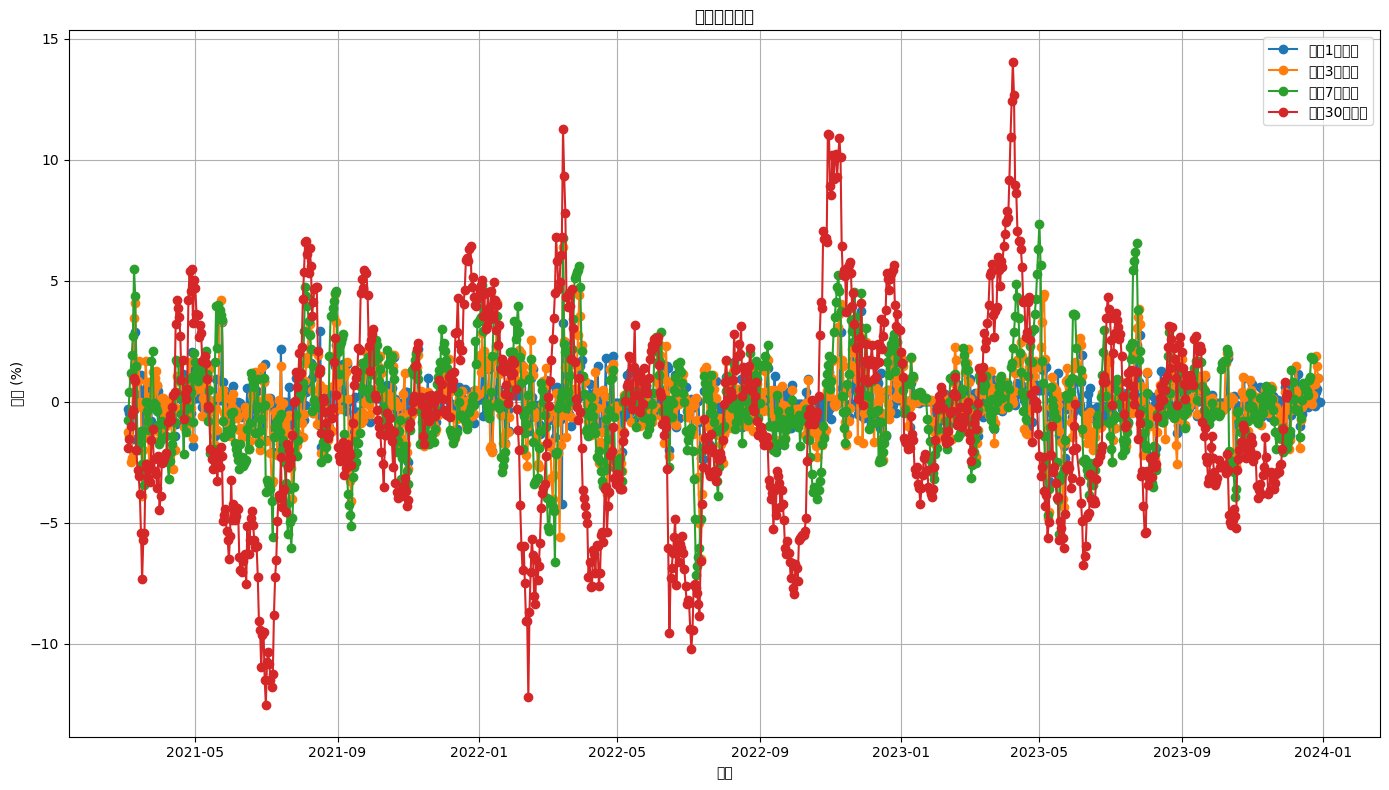

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取合并后的数据
merged_df_path = 'C:\\Users\\mjy\\Desktop\\Project_MSCM\\DATA_INPUT.csv'
merged_df = pd.read_csv(merged_df_path)

# 设置日期为索引（如果需要）
merged_df['日期'] = pd.to_datetime(merged_df['日期'])
merged_df.set_index('日期', inplace=True)

# 绘制涨幅变化图
plt.figure(figsize=(14, 8))

# 未来1日涨幅
plt.plot(merged_df.index, merged_df['未来1日涨幅'], label='未来1日涨幅', marker='o')

# 未来3日涨幅
plt.plot(merged_df.index, merged_df['未来3日涨幅'], label='未来3日涨幅', marker='o')

# 未来7日涨幅
plt.plot(merged_df.index, merged_df['未来7日涨幅'], label='未来7日涨幅', marker='o')

# 未来30日涨幅
plt.plot(merged_df.index, merged_df['未来30日涨幅'], label='未来30日涨幅', marker='o')

# 添加标题和标签
plt.title('未来涨幅变化')
plt.xlabel('日期')
plt.ylabel('涨幅 (%)')
plt.legend()
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()